In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

## Daten laden
##### Bereinigten Stand 'df_bereinigt.csv' laden

In [3]:
df = pd.read_parquet("bereinigt.parquet", engine="fastparquet")
print("Parquet erfolgreich geladen ✅")

Parquet erfolgreich geladen ✅


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              2236 non-null   int64         
 1   Geburtsjahr                     2236 non-null   int64         
 2   Bildungsniveau                  2236 non-null   object        
 3   Familienstand                   2236 non-null   object        
 4   Einkommen                       2236 non-null   float64       
 5   Kinder_zu_Hause                 2236 non-null   int64         
 6   Teenager_zu_Hause               2236 non-null   int64         
 7   Datum_Kunde                     2236 non-null   datetime64[ns]
 8   Letzter_Kauf_Tage               2236 non-null   int64         
 9   Beschwerde                      2236 non-null   int64         
 10  Ausgaben_Wein                   2236 non-null   int64         
 11  Ausg

##### Datensatz einlesen und erste Übersicht, Statistische Beschreibung der Daten, Fehlende Werte identifizieren und entsprechend bearbeiten

In [ ]:
#df = pd.read_csv('Marktkampagne.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Geburtsjahr              2240 non-null   int64  
 2   Bildungsniveau           2240 non-null   object 
 3   Familienstand            2240 non-null   object 
 4   Einkommen                2216 non-null   float64
 5   Kinder_zu_Hause          2240 non-null   int64  
 6   Teenager_zu_Hause        2240 non-null   int64  
 7   Datum_Kunde              2240 non-null   object 
 8   Letzter_Kauf_Tage        2240 non-null   int64  
 9   Beschwerde               2240 non-null   int64  
 10  Ausgaben_Wein            2240 non-null   int64  
 11  Ausgaben_Obst            2240 non-null   int64  
 12  Ausgaben_Fleisch         2240 non-null   int64  
 13  Ausgaben_Fisch           2240 non-null   int64  
 14  Ausgaben_Süßigkeiten    

In [6]:
df.head(10)

,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Beschwerde,...,Anzahl_Webkäufe,Anzahl_Katalogkäufe,Anzahl_Ladeneinkäufe,Anzahl_WebBesuche_Monat,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Antwort_Letzte_Kampagne
0,5524,1967,Hochschulabschluss,Ledig,58138.0,0,0,04-09-2022,58,0,...,8,10,4,7,0,0,0,0,0,1
1,2174,1964,Hochschulabschluss,Ledig,46344.0,1,1,08-03-2024,38,0,...,1,1,2,5,0,0,0,0,0,0
2,4141,1975,Hochschulabschluss,Zusammenlebend,71613.0,0,0,21-08-2023,26,0,...,8,2,10,4,0,0,0,0,0,0
3,6182,1994,Hochschulabschluss,Zusammenlebend,26646.0,1,0,10-02-2024,26,0,...,2,0,4,6,0,0,0,0,0,0
4,5324,1991,Doktor,Verheiratet,58293.0,1,0,19-01-2024,94,0,...,5,3,6,5,0,0,0,0,0,0
5,7446,1977,Master,Zusammenlebend,62513.0,0,1,09-09-2023,16,0,...,6,4,10,6,0,0,0,0,0,0
6,965,1981,Hochschulabschluss,Geschieden,55635.0,0,1,13-11-2022,34,0,...,7,3,7,6,0,0,0,0,0,0
7,6177,1995,Doktor,Verheiratet,33454.0,1,0,08-05-2023,32,0,...,4,0,4,8,0,0,0,0,0,0
8,4855,1984,Doktor,Zusammenlebend,30351.0,1,0,06-06-2023,19,0,...,3,0,2,9,0,0,0,0,0,1
9,5899,1960,Doktor,Zusammenlebend,5648.0,1,1,13-03-2024,68,0,...,1,0,0,20,0,0,1,0,0,0


In [7]:
df['Datum_Kunde'] = pd.to_datetime(df['Datum_Kunde'], format='%d-%m-%Y', errors='coerce')       # Spalte in Datetime-Format umwandeln

df.dtypes['Datum_Kunde'], df['Datum_Kunde'].head()

(dtype('<M8[ns]'),
 0   2022-09-04
 1   2024-03-08
 2   2023-08-21
 3   2024-02-10
 4   2024-01-19
 Name: Datum_Kunde, dtype: datetime64[ns])

In [8]:
df.dtypes

ID                                  int64
Geburtsjahr                         int64
Bildungsniveau                     object
Familienstand                      object
Einkommen                         float64
Kinder_zu_Hause                     int64
Teenager_zu_Hause                   int64
Datum_Kunde                datetime64[ns]
Letzter_Kauf_Tage                   int64
Beschwerde                          int64
Ausgaben_Wein                       int64
Ausgaben_Obst                       int64
Ausgaben_Fleisch                    int64
Ausgaben_Fisch                      int64
Ausgaben_Süßigkeiten                int64
Ausgaben_Gold                       int64
Anzahl_Rabattkäufe                  int64
Anzahl_Webkäufe                     int64
Anzahl_Katalogkäufe                 int64
Anzahl_Ladeneinkäufe                int64
Anzahl_WebBesuche_Monat             int64
Kampagne_1_Akzeptiert               int64
Kampagne_2_Akzeptiert               int64
Kampagne_3_Akzeptiert             

In [9]:
df.describe()

,ID,Geburtsjahr,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Beschwerde,Ausgaben_Wein,Ausgaben_Obst,...,Anzahl_Webkäufe,Anzahl_Katalogkäufe,Anzahl_Ladeneinkäufe,Anzahl_WebBesuche_Monat,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Antwort_Letzte_Kampagne
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1978.805804,52247.251354,0.444196,0.506250,2023-07-10 14:11:47.142856960,49.109375,0.009375,303.935714,26.302232,...,4.084821,2.662054,5.790179,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107
min,0.000000,1903.000000,1730.000000,0.000000,0.000000,2022-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1969.000000,35303.000000,0.000000,0.000000,2023-01-16 00:00:00,24.000000,0.000000,23.750000,1.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1980.000000,51381.500000,0.000000,0.000000,2023-07-08 12:00:00,49.000000,0.000000,173.500000,8.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1987.000000,68522.000000,1.000000,1.000000,2023-12-30 06:00:00,74.000000,0.000000,504.250000,33.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,2006.000000,666666.000000,2.000000,2.000000,2024-06-29 00:00:00,99.000000,1.000000,1493.000000,199.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,0.096391,336.597393,39.773434,...,2.778714,2.923101,3.250958,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()

ID                          0
Geburtsjahr                 0
Bildungsniveau              0
Familienstand               0
Einkommen                  24
Kinder_zu_Hause             0
Teenager_zu_Hause           0
Datum_Kunde                 0
Letzter_Kauf_Tage           0
Beschwerde                  0
Ausgaben_Wein               0
Ausgaben_Obst               0
Ausgaben_Fleisch            0
Ausgaben_Fisch              0
Ausgaben_Süßigkeiten        0
Ausgaben_Gold               0
Anzahl_Rabattkäufe          0
Anzahl_Webkäufe             0
Anzahl_Katalogkäufe         0
Anzahl_Ladeneinkäufe        0
Anzahl_WebBesuche_Monat     0
Kampagne_1_Akzeptiert       0
Kampagne_2_Akzeptiert       0
Kampagne_3_Akzeptiert       0
Kampagne_4_Akzeptiert       0
Kampagne_5_Akzeptiert       0
Antwort_Letzte_Kampagne     0
dtype: int64

In [12]:
median_income_by_edu = (                                                # Median Einkommen nach Bildungsniveau berechnen
    df.groupby('Bildungsniveau')['Einkommen'].median().sort_values()
)

print(median_income_by_edu)

Bildungsniveau
Grundbildung             20744.0
Zweiter Studienzyklus    46805.0
Master                   50943.0
Hochschulabschluss       52028.5
Doktor                   55212.0
Name: Einkommen, dtype: float64


In [13]:
df['Einkommen'] = df.groupby('Bildungsniveau')['Einkommen'].transform(  # fehlende Einkommen mit dem Median des jeweiligen Bildungsniveaus imputieren
    lambda x: x.fillna(x.median())
)

print(df['Einkommen'].isna().sum())

0


In [14]:
outlier_einkommen = df.loc[df['Einkommen'] > 100000, ['ID', 'Geburtsjahr', 'Einkommen',     # Outlier-Prüfung für Einkommen
                                                      'Bildungsniveau', 'Familienstand']] 

print('Verdächtige Ausreißer (Einkommen > 100000):')
display(outlier_einkommen)

Verdächtige Ausreißer (Einkommen > 100000):


,ID,Geburtsjahr,Einkommen,Bildungsniveau,Familienstand
124,7215,1993,101970.0,Hochschulabschluss,Ledig
164,8475,1983,157243.0,Doktor,Verheiratet
203,2798,1987,102160.0,Doktor,Zusammenlebend
252,10089,1984,102692.0,Hochschulabschluss,Geschieden
617,1503,1986,162397.0,Doktor,Zusammenlebend
646,4611,1980,105471.0,Hochschulabschluss,Zusammenlebend
655,5555,1985,153924.0,Hochschulabschluss,Geschieden
687,1501,1992,160803.0,Doktor,Verheiratet
1300,5336,1981,157733.0,Master,Zusammenlebend
1653,4931,1987,157146.0,Hochschulabschluss,Zusammenlebend


##### Also die 666666 sieht nicht echt aus und werde ich mit dem Median ersetzen für Personen, die einen Hochschulabschluß haben und zusammenlebend oder verheiratet sind.

In [15]:
median_ek_hochschule = df.loc[                                      # Median Einkommen für Hochschulabsolventen und Zusammenlebend/Verheiratet berechnen
    (df['Bildungsniveau'] == 'Hochschulabschluss') &
    (df['Familienstand'].isin(['Verheiratet', 'Zusammenlebend'])),
    'Einkommen'
].median()

print('Median Einkommen (Hochschulabschluss und verheiratet/zusammenlebend):', median_ek_hochschule)

df.loc[df['Einkommen'] == 666666, 'Einkommen'] = median_ek_hochschule       # Extremwert 666666 ersetzen

Median Einkommen (Hochschulabschluss und verheiratet/zusammenlebend): 52028.5


In [16]:
df.nunique()

ID                         2240
Geburtsjahr                  59
Bildungsniveau                5
Familienstand                 8
Einkommen                  1975
Kinder_zu_Hause               3
Teenager_zu_Hause             3
Datum_Kunde                 663
Letzter_Kauf_Tage           100
Beschwerde                    2
Ausgaben_Wein               776
Ausgaben_Obst               158
Ausgaben_Fleisch            558
Ausgaben_Fisch              182
Ausgaben_Süßigkeiten        177
Ausgaben_Gold               213
Anzahl_Rabattkäufe           15
Anzahl_Webkäufe              15
Anzahl_Katalogkäufe          14
Anzahl_Ladeneinkäufe         14
Anzahl_WebBesuche_Monat      16
Kampagne_1_Akzeptiert         2
Kampagne_2_Akzeptiert         2
Kampagne_3_Akzeptiert         2
Kampagne_4_Akzeptiert         2
Kampagne_5_Akzeptiert         2
Antwort_Letzte_Kampagne       2
dtype: int64

In [17]:
df['Familienstand'].value_counts()

Familienstand
Verheiratet            864
Zusammenlebend         580
Ledig                  480
Geschieden             232
Verwitwet               77
Allein                   3
Absurd                   2
Man lebt nur einmal      2
Name: count, dtype: int64

In [18]:
df_problem = df.loc[df['Familienstand'].isin(['Absurd', 'Man lebt nur einmal']),
                ['ID', 'Geburtsjahr', 'Bildungsniveau', 'Familienstand', 'Einkommen']]
df_problem

,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen
2093,7734,2003,Hochschulabschluss,Absurd,79244.0
2134,4369,1967,Master,Absurd,65487.0
2177,492,1983,Doktor,Man lebt nur einmal,48432.0
2202,11133,1983,Doktor,Man lebt nur einmal,48432.0


##### Ich habe mich dazu entschlossen 4 Zeilen zu löschen, da die Angaben bezüglich Familienstand, Einkommen in Kombination zu Bildungsstand unglaubwürdig sind. Kunde mit Hochschulabschluß, der 2003 geboren wurde und ein Familieneinkommen in Höhe von 79240 € hat, als Famileinstand Absurd angibt, ist unglaubwürdig, denn der Median bei dem Bildungsniveau ist etwas über 52000 €. Gleiche merkwürdige Angaben bei drei weiteren Kunden. Keine glaubwürdige Zuordnung möglich, deshalb gelöscht. 

In [19]:
df_removed = df[df['Familienstand'].isin(['Absurd', 'Man lebt nur einmal'])]    # Problematische Zeilen sparat abgespeichert

df = df[~df['Familienstand'].isin(['Absurd', 'Man lebt nur einmal'])]   # Direkt im Original-Dataframe löschen

print('Entfernte Zeile:', len(df_removed))
print('Verbleibende Zeilen:', len(df))



Entfernte Zeile: 4
Verbleibende Zeilen: 2236


In [20]:
df_removed.to_csv('removed_rows.csv', index=False, encoding='utf-8-sig')

In [21]:
df.describe(include=['O'])          # Beschreibung der Spalten mit Objektdaten

,Bildungsniveau,Familienstand
count,2236,2236
unique,5,6
top,Hochschulabschluss,Verheiratet
freq,1126,864


In [22]:
df['Familienstand'] = df['Familienstand'].replace({'Allein': 'Ledig'})  # Familienstand Allein zu Ledig umcodiert

print(df['Familienstand'].value_counts())

Familienstand
Verheiratet       864
Zusammenlebend    580
Ledig             483
Geschieden        232
Verwitwet          77
Name: count, dtype: int64


In [23]:
df_alt = df[df['Geburtsjahr'] < 1935]
print('Anzahl Kunden:', len(df_alt))
print(df_alt)

Anzahl Kunden: 3
        ID  Geburtsjahr         Bildungsniveau   Familienstand  Einkommen  \
192   7829         1910  Zweiter Studienzyklus      Geschieden    36640.0   
239  11004         1903  Zweiter Studienzyklus           Ledig    60182.0   
339   1150         1909                 Doktor  Zusammenlebend    83532.0   

     Kinder_zu_Hause  Teenager_zu_Hause Datum_Kunde  Letzter_Kauf_Tage  \
192                1                  0  2023-09-26                 99   
239                0                  1  2024-05-17                 23   
339                0                  0  2023-09-26                 36   

     Beschwerde  ...  Anzahl_Webkäufe  Anzahl_Katalogkäufe  \
192           1  ...                2                    1   
239           0  ...                1                    0   
339           0  ...                4                    6   

     Anzahl_Ladeneinkäufe  Anzahl_WebBesuche_Monat  Kampagne_1_Akzeptiert  \
192                     2                        5 

In [24]:
median_teen = df.loc[df['Kinder_zu_Hause'] > 0, 'Geburtsjahr'].median()     # Median des Geburtsjahres berechnet für Personen die ein Kind zuhause haben

median_kind = df.loc[df['Teenager_zu_Hause'] > 0, 'Geburtsjahr'].median()   # Median des Geburtsjahres berechnet für Personen die ein Teen zuhause haben

print('Median Geburtsjahr (Teenager zuhause):', median_teen)
print('Median Geburtsjahr (Kind zuhause):', median_kind)

Median Geburtsjahr (Teenager zuhause): 1983.0
Median Geburtsjahr (Kind zuhause): 1975.0


In [25]:
df.loc[(df['Geburtsjahr'] < 1935) & (df['Teenager_zu_Hause'] > 0), 'Geburtsjahr'] = median_teen     # Die fehlerhaften Geburtsjahre ersetzt
df.loc[(df['Geburtsjahr'] < 1935) & (df['Kinder_zu_Hause'] > 0), 'Geburtsjahr'] = median_kind

print(df[df['Geburtsjahr'] < 1935])

       ID  Geburtsjahr Bildungsniveau   Familienstand  Einkommen  \
339  1150         1909         Doktor  Zusammenlebend    83532.0   

     Kinder_zu_Hause  Teenager_zu_Hause Datum_Kunde  Letzter_Kauf_Tage  \
339                0                  0  2023-09-26                 36   

     Beschwerde  ...  Anzahl_Webkäufe  Anzahl_Katalogkäufe  \
339           0  ...                4                    6   

     Anzahl_Ladeneinkäufe  Anzahl_WebBesuche_Monat  Kampagne_1_Akzeptiert  \
339                     4                        1                      0   

     Kampagne_2_Akzeptiert  Kampagne_3_Akzeptiert  Kampagne_4_Akzeptiert  \
339                      0                      0                      0   

     Kampagne_5_Akzeptiert  Antwort_Letzte_Kampagne  
339                      1                        0  

[1 rows x 27 columns]


In [26]:
median_dr = df.loc[(df['Bildungsniveau'] == 'Doktor') & (df['Einkommen'] > 80000),
                   'Geburtsjahr'].median()   # Median des Geburtsjahres berechnet für Personen die Doktor sind und ein Einkommen von mehr als 80000 haben

anzahl_dr = df.loc[(df['Bildungsniveau'] == 'Doktor') & (df['Einkommen'] > 80000)].shape[0]

print('Median Geburtsjahr (Doktor, Einkommen > 80.000):', median_dr)
print('Anzahl Doktoren mit Einkommen > 80000:', anzahl_dr)

Median Geburtsjahr (Doktor, Einkommen > 80.000): 1978.0
Anzahl Doktoren mit Einkommen > 80000: 53


In [27]:
df.loc[(df['Geburtsjahr'] < 1935) & (df['Bildungsniveau'] == 'Doktor'), 'Geburtsjahr'] = median_dr  
                                            # Fehlerhaftes Geburtsjahr durch den eben errechneten Median ersetzt
print(df[df['Geburtsjahr'] < 1935])

Empty DataFrame
Columns: [ID, Geburtsjahr, Bildungsniveau, Familienstand, Einkommen, Kinder_zu_Hause, Teenager_zu_Hause, Datum_Kunde, Letzter_Kauf_Tage, Beschwerde, Ausgaben_Wein, Ausgaben_Obst, Ausgaben_Fleisch, Ausgaben_Fisch, Ausgaben_Süßigkeiten, Ausgaben_Gold, Anzahl_Rabattkäufe, Anzahl_Webkäufe, Anzahl_Katalogkäufe, Anzahl_Ladeneinkäufe, Anzahl_WebBesuche_Monat, Kampagne_1_Akzeptiert, Kampagne_2_Akzeptiert, Kampagne_3_Akzeptiert, Kampagne_4_Akzeptiert, Kampagne_5_Akzeptiert, Antwort_Letzte_Kampagne]
Index: []

[0 rows x 27 columns]


In [28]:
df.describe()

,ID,Geburtsjahr,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Beschwerde,Ausgaben_Wein,Ausgaben_Obst,...,Anzahl_Webkäufe,Anzahl_Katalogkäufe,Anzahl_Ladeneinkäufe,Anzahl_WebBesuche_Monat,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Antwort_Letzte_Kampagne
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236,2236.000000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,5591.551878,1978.892218,51953.121646,0.444991,0.506261,2023-07-10 20:06:52.164579584,49.147138,0.009392,303.873435,26.271020,...,4.082737,2.659213,5.789356,5.317531,0.063953,0.013417,0.072898,0.074687,0.072451,0.148479
min,0.000000,1950.000000,1730.000000,0.000000,0.000000,2022-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1969.000000,35502.500000,0.000000,0.000000,2023-01-17 00:00:00,24.000000,0.000000,23.000000,1.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1980.000000,51498.500000,0.000000,0.000000,2023-07-09 00:00:00,49.000000,0.000000,173.000000,8.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1987.000000,68275.750000,1.000000,1.000000,2023-12-30 06:00:00,74.000000,0.000000,505.000000,33.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,2006.000000,162397.000000,2.000000,2.000000,2024-06-29 00:00:00,99.000000,1.000000,1493.000000,199.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3245.240106,11.690701,21416.446109,0.538551,0.544615,NaN,28.954880,0.096477,336.876776,39.761356,...,2.779736,2.920752,3.253756,2.424756,0.244725,0.115077,0.260027,0.262944,0.259291,0.355654


In [29]:
df.corr(numeric_only=True)

,ID,Geburtsjahr,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Letzter_Kauf_Tage,Beschwerde,Ausgaben_Wein,Ausgaben_Obst,Ausgaben_Fleisch,...,Anzahl_Webkäufe,Anzahl_Katalogkäufe,Anzahl_Ladeneinkäufe,Anzahl_WebBesuche_Monat,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Antwort_Letzte_Kampagne
ID,1.000000,0.002432,-0.000461,0.002565,-0.002523,-0.046640,0.033947,-0.023092,0.004258,-0.004111,...,-0.019080,-0.004023,-0.015050,-0.007241,-0.022872,-0.015059,-0.036038,-0.025369,-0.008635,-0.024955
Geburtsjahr,0.002432,1.000000,-0.199852,0.234816,-0.363385,-0.019882,-0.005846,-0.163735,-0.014990,-0.030016,...,-0.154715,-0.127604,-0.139864,0.118482,-0.011821,-0.007572,0.061313,-0.064188,0.011876,0.015795
Einkommen,-0.000461,-0.199852,1.000000,-0.510397,0.035137,0.006438,-0.030518,0.686126,0.504846,0.683876,...,0.451104,0.693375,0.627182,-0.646256,0.324010,0.104035,-0.015068,0.217341,0.394520,0.160051
Kinder_zu_Hause,0.002565,0.234816,-0.510397,1.000000,-0.036199,0.007764,0.040088,-0.496479,-0.372606,-0.437571,...,-0.361438,-0.502593,-0.499795,0.448524,-0.171893,-0.081939,0.014271,-0.162130,-0.205347,-0.078809
Teenager_zu_Hause,-0.002523,-0.363385,0.035137,-0.036199,1.000000,0.017632,0.003138,0.004934,-0.175416,-0.260561,...,0.154673,-0.109201,0.050864,0.133004,-0.138965,-0.015619,-0.042718,0.038913,-0.190152,-0.154949
Letzter_Kauf_Tage,-0.046640,-0.019882,0.006438,0.007764,0.017632,1.000000,0.013119,0.016089,-0.005394,0.022410,...,-0.009251,0.024041,0.000842,-0.019708,-0.020271,-0.001936,-0.033397,0.018478,-0.000765,-0.198118
Beschwerde,0.033947,-0.005846,-0.030518,0.040088,0.003138,0.013119,1.000000,-0.038992,-0.005096,-0.023487,...,-0.016246,-0.020393,-0.016500,0.019761,-0.025451,-0.011355,0.008367,-0.027663,-0.009327,-0.001540
Ausgaben_Wein,-0.023092,-0.163735,0.686126,-0.496479,0.004934,0.016089,-0.038992,1.000000,0.389821,0.563240,...,0.542508,0.635884,0.642083,-0.320984,0.354471,0.205944,0.062262,0.373389,0.473215,0.247309
Ausgaben_Obst,0.004258,-0.014990,0.504846,-0.372606,-0.175416,-0.005394,-0.005096,0.389821,1.000000,0.543301,...,0.298001,0.486526,0.462014,-0.416862,0.192352,-0.009693,0.014966,0.010388,0.213655,0.124440
Ausgaben_Fleisch,-0.004111,-0.030016,0.683876,-0.437571,-0.260561,0.022410,-0.023487,0.563240,0.543301,1.000000,...,0.294838,0.724919,0.479988,-0.539437,0.311347,0.043074,0.018316,0.103015,0.375439,0.238037


##### Datenvisualisierung, Erwartete Ergebnisse und Interpretation

<Axes: ylabel='Frequency'>

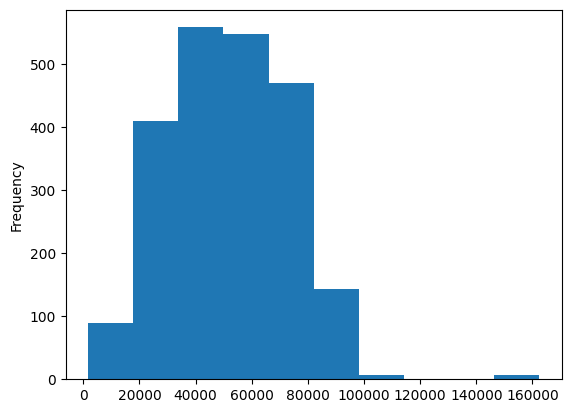

In [30]:
df['Einkommen'].plot.hist()         # Einkommesverteilung

<Axes: >

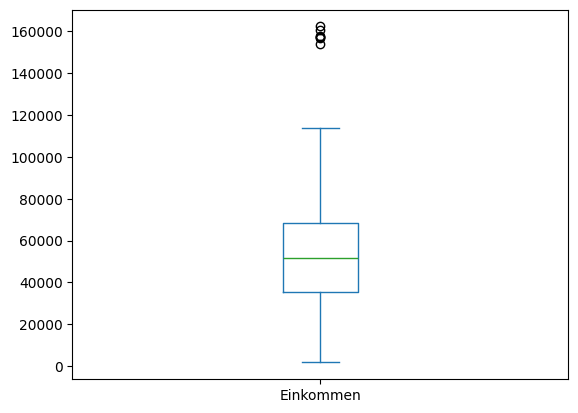

In [31]:
df['Einkommen'].plot.box()          # Ausreißererkennung im Einkommen

<Axes: ylabel='Frequency'>

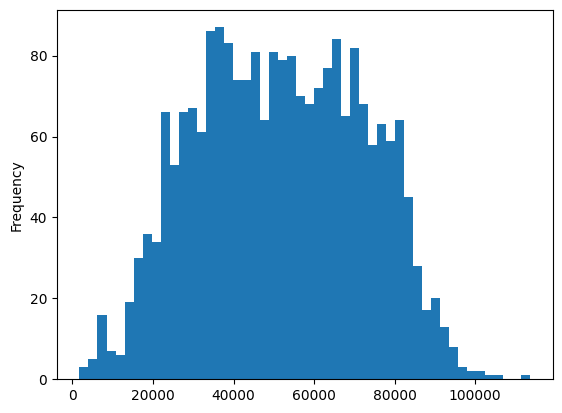

In [32]:
df[df['Einkommen'] < 150000]['Einkommen'].plot.hist(bins=50)        # Einkommensverteilung bis max 150000

In [33]:
anzahl_u_20k = df.loc[(df['Einkommen'] < 20000) & (~df['Familienstand'].isin(['Ledig', 'Geschieden', 'Verwitwet']))].shape[0]

print('Anzahl Personen mit Einkommen unter 20000:', anzahl_u_20k)

Anzahl Personen mit Einkommen unter 20000: 84


In [34]:
df_geringes_ek = df.loc[(df['Einkommen'] < 20000)& (~df['Familienstand'].isin(['Ledig', 'Geschieden', 'Verwitwet']))]

df_geringes_ek

,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Beschwerde,...,Anzahl_Webkäufe,Anzahl_Katalogkäufe,Anzahl_Ladeneinkäufe,Anzahl_WebBesuche_Monat,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Antwort_Letzte_Kampagne
9,5899,1960,Doktor,Zusammenlebend,5648.0,1,1,2024-03-13,68,0,...,1,0,0,20,0,0,1,0,0,0
11,387,1986,Grundbildung,Verheiratet,7500.0,0,0,2022-11-13,59,0,...,2,0,3,8,0,0,0,0,0,0
14,2569,1997,Hochschulabschluss,Verheiratet,17323.0,0,0,2022-10-10,38,0,...,1,0,3,8,0,0,0,0,0,0
21,5376,1989,Hochschulabschluss,Verheiratet,2447.0,1,0,2023-01-06,42,0,...,0,28,0,1,0,0,0,0,0,0
44,2139,1985,Master,Verheiratet,7500.0,1,0,2023-10-02,19,0,...,2,0,3,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,9481,1986,Hochschulabschluss,Verheiratet,17148.0,1,0,2024-01-28,80,0,...,3,1,3,8,0,0,0,0,0,0
2204,1876,2000,Hochschulabschluss,Verheiratet,18929.0,0,0,2023-02-16,15,0,...,1,0,4,6,0,0,0,0,0,0
2208,3850,1973,Grundbildung,Zusammenlebend,14918.0,0,1,2022-12-07,52,0,...,1,0,3,6,0,0,0,0,0,0
2214,9303,1986,Hochschulabschluss,Verheiratet,5305.0,0,1,2023-07-30,12,0,...,1,0,0,13,0,0,0,0,0,0


In [35]:
kreuztabelle_klein_ek = (df.loc[df['Einkommen'] < 20000, 'Familienstand'].value_counts())   # Kreuztabelle für Familienstand mit Einkommen unter 20000

print(kreuztabelle_klein_ek)

Familienstand
Verheiratet       57
Ledig             31
Zusammenlebend    27
Geschieden        12
Name: count, dtype: int64


C:\Users\thort\AppData\Local\Temp\ipykernel_15000\986539619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=summe.index, y=summe.values, palette='pastel')


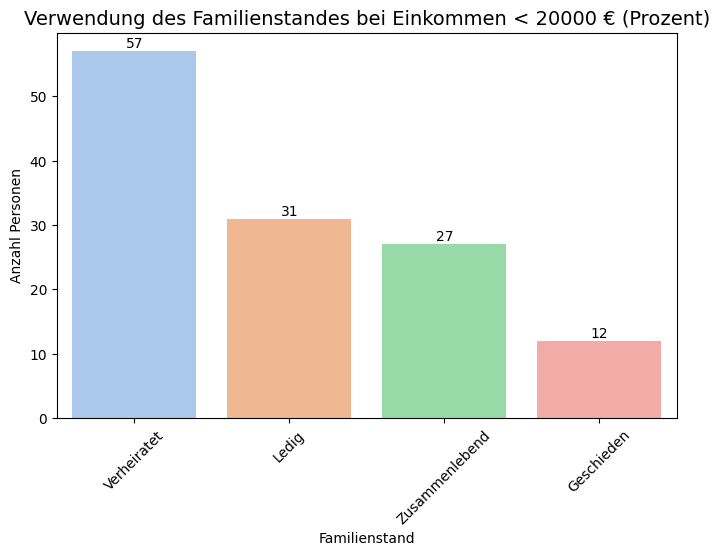

In [36]:
klein_ek = df.loc[df['Einkommen'] < 20000, 'Familienstand']         # Filter für Einkommen unter 20000

summe = klein_ek.value_counts()                                     # Häufigkeiten

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=summe.index, y=summe.values, palette='pastel')
plt.title('Verwendung des Familienstandes bei Einkommen < 20000 € (Prozent)', fontsize=14)
plt.ylabel('Anzahl Personen')
plt.xlabel('Familienstand')
plt.xticks(rotation=45)
for i, p in enumerate(ax.patches):
    ax.text(
        p.get_x() + p.get_width() / 2,                  # x-Position (Balkenmitte)
        p.get_height() + 0.5,                           # y-Position (leicht über den Balken)
        f'{summe.values[i]}',
        ha='center', fontsize=10
    )
plt.show()

In [37]:
df['Klein_EK_Flag_Alle'] = (df['Einkommen'] < 20000).astype(int)         # Neue Spalte: Markierung für Einkommen < 20000 

df['Klein_EK_Flag_Partner'] = (                                          # Neue Spalte: Markierung für Einkommen < 20000 und verheiratet/zusammenlebend
    (df['Einkommen'] <20000) &
    (df['Familienstand'].isin(['Verheiratet', 'Zusammenlebend']))
).astype(int)

print(df['Klein_EK_Flag_Alle'].value_counts())
print(df['Klein_EK_Flag_Partner'].value_counts())

Klein_EK_Flag_Alle
0    2109
1     127
Name: count, dtype: int64
Klein_EK_Flag_Partner
0    2152
1      84
Name: count, dtype: int64


In [38]:
ausgaben_cols = [col for col in df.columns if 'Ausgaben' in col]        # Ausgabenspalten identifizieren

def group_stats(mask, label):                                           # Medianwerte und Ausgabemittel berechnen
    return pd.Series({
        'Anzahl': mask.sum(),
        'Median Einkommen': df.loc[mask, 'Einkommen'].median(),
        'Median Geburtsjahr': df.loc[mask, 'Geburtsjahr'].median(),
        **df.loc[mask, ausgaben_cols].mean().round(2).to_dict()         # Dictionary Unpacking, bedeutet: füge diese Key-Value-Paare als einzelne Argumente ein
    }, name=label)

g1 = group_stats(df['Klein_EK_Flag_Alle'] == 1, 'Klein_EK_Alle')        # Drei Gruppen definieren
g2 = group_stats(df['Klein_EK_Flag_Partner'] == 1, 'Klein_EK_Partner')
g3 = group_stats(df['Klein_EK_Flag_Alle'] == 0, 'Rest')

report = pd.DataFrame([g1, g2, g3])                                     # Alles in eine Tabelle packen

print(report)



                  Anzahl  Median Einkommen  Median Geburtsjahr  Ausgaben_Wein  \
Klein_EK_Alle      127.0           15759.0              1988.0           9.61   
Klein_EK_Partner    84.0           16893.5              1987.0           9.06   
Rest              2109.0           53367.0              1980.0         321.59   

                  Ausgaben_Obst  Ausgaben_Fleisch  Ausgaben_Fisch  \
Klein_EK_Alle              5.05             24.76            7.74   
Klein_EK_Partner           4.67             31.44            7.89   
Rest                      27.55            175.49           39.19   

                  Ausgaben_Süßigkeiten  Ausgaben_Gold  
Klein_EK_Alle                     5.37          20.16  
Klein_EK_Partner                  5.56          17.55  
Rest                             28.39          45.31  


##### Also ich habe die geringen Einkommen als Marker gesetzt in zwei unterschiedlichen Spalten, einmal alle (127) und einmal die, die verheiratet oder zusammenlebend sind (84). Ich komme aber zum Schluß nach diesem Vergleich, dass die Einkommen wohl leider tatsächlich so gering sind. Also verändere ich nichts, aber habe sie markiert.

Numerische Spalten: ['ID', 'Geburtsjahr', 'Einkommen', 'Kinder_zu_Hause', 'Teenager_zu_Hause', 'Letzter_Kauf_Tage', 'Ausgaben_Wein', 'Ausgaben_Obst', 'Ausgaben_Fleisch', 'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten', 'Ausgaben_Gold', 'Anzahl_Rabattkäufe', 'Anzahl_Webkäufe', 'Anzahl_Katalogkäufe', 'Anzahl_Ladeneinkäufe', 'Anzahl_WebBesuche_Monat']
Kategorische Spalten: ['Bildungsniveau', 'Familienstand']


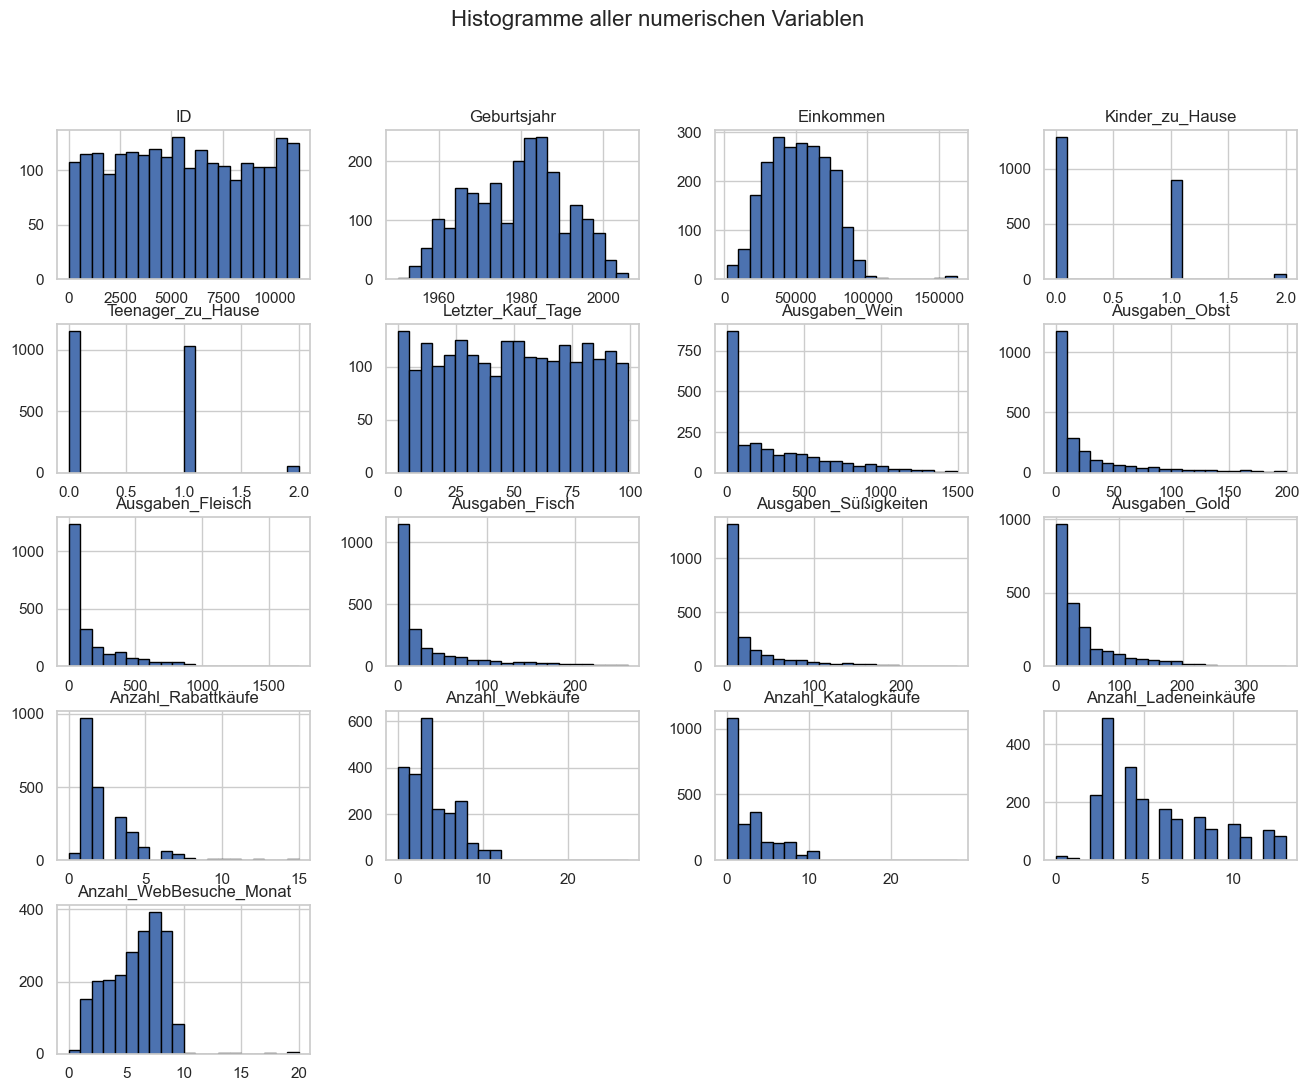

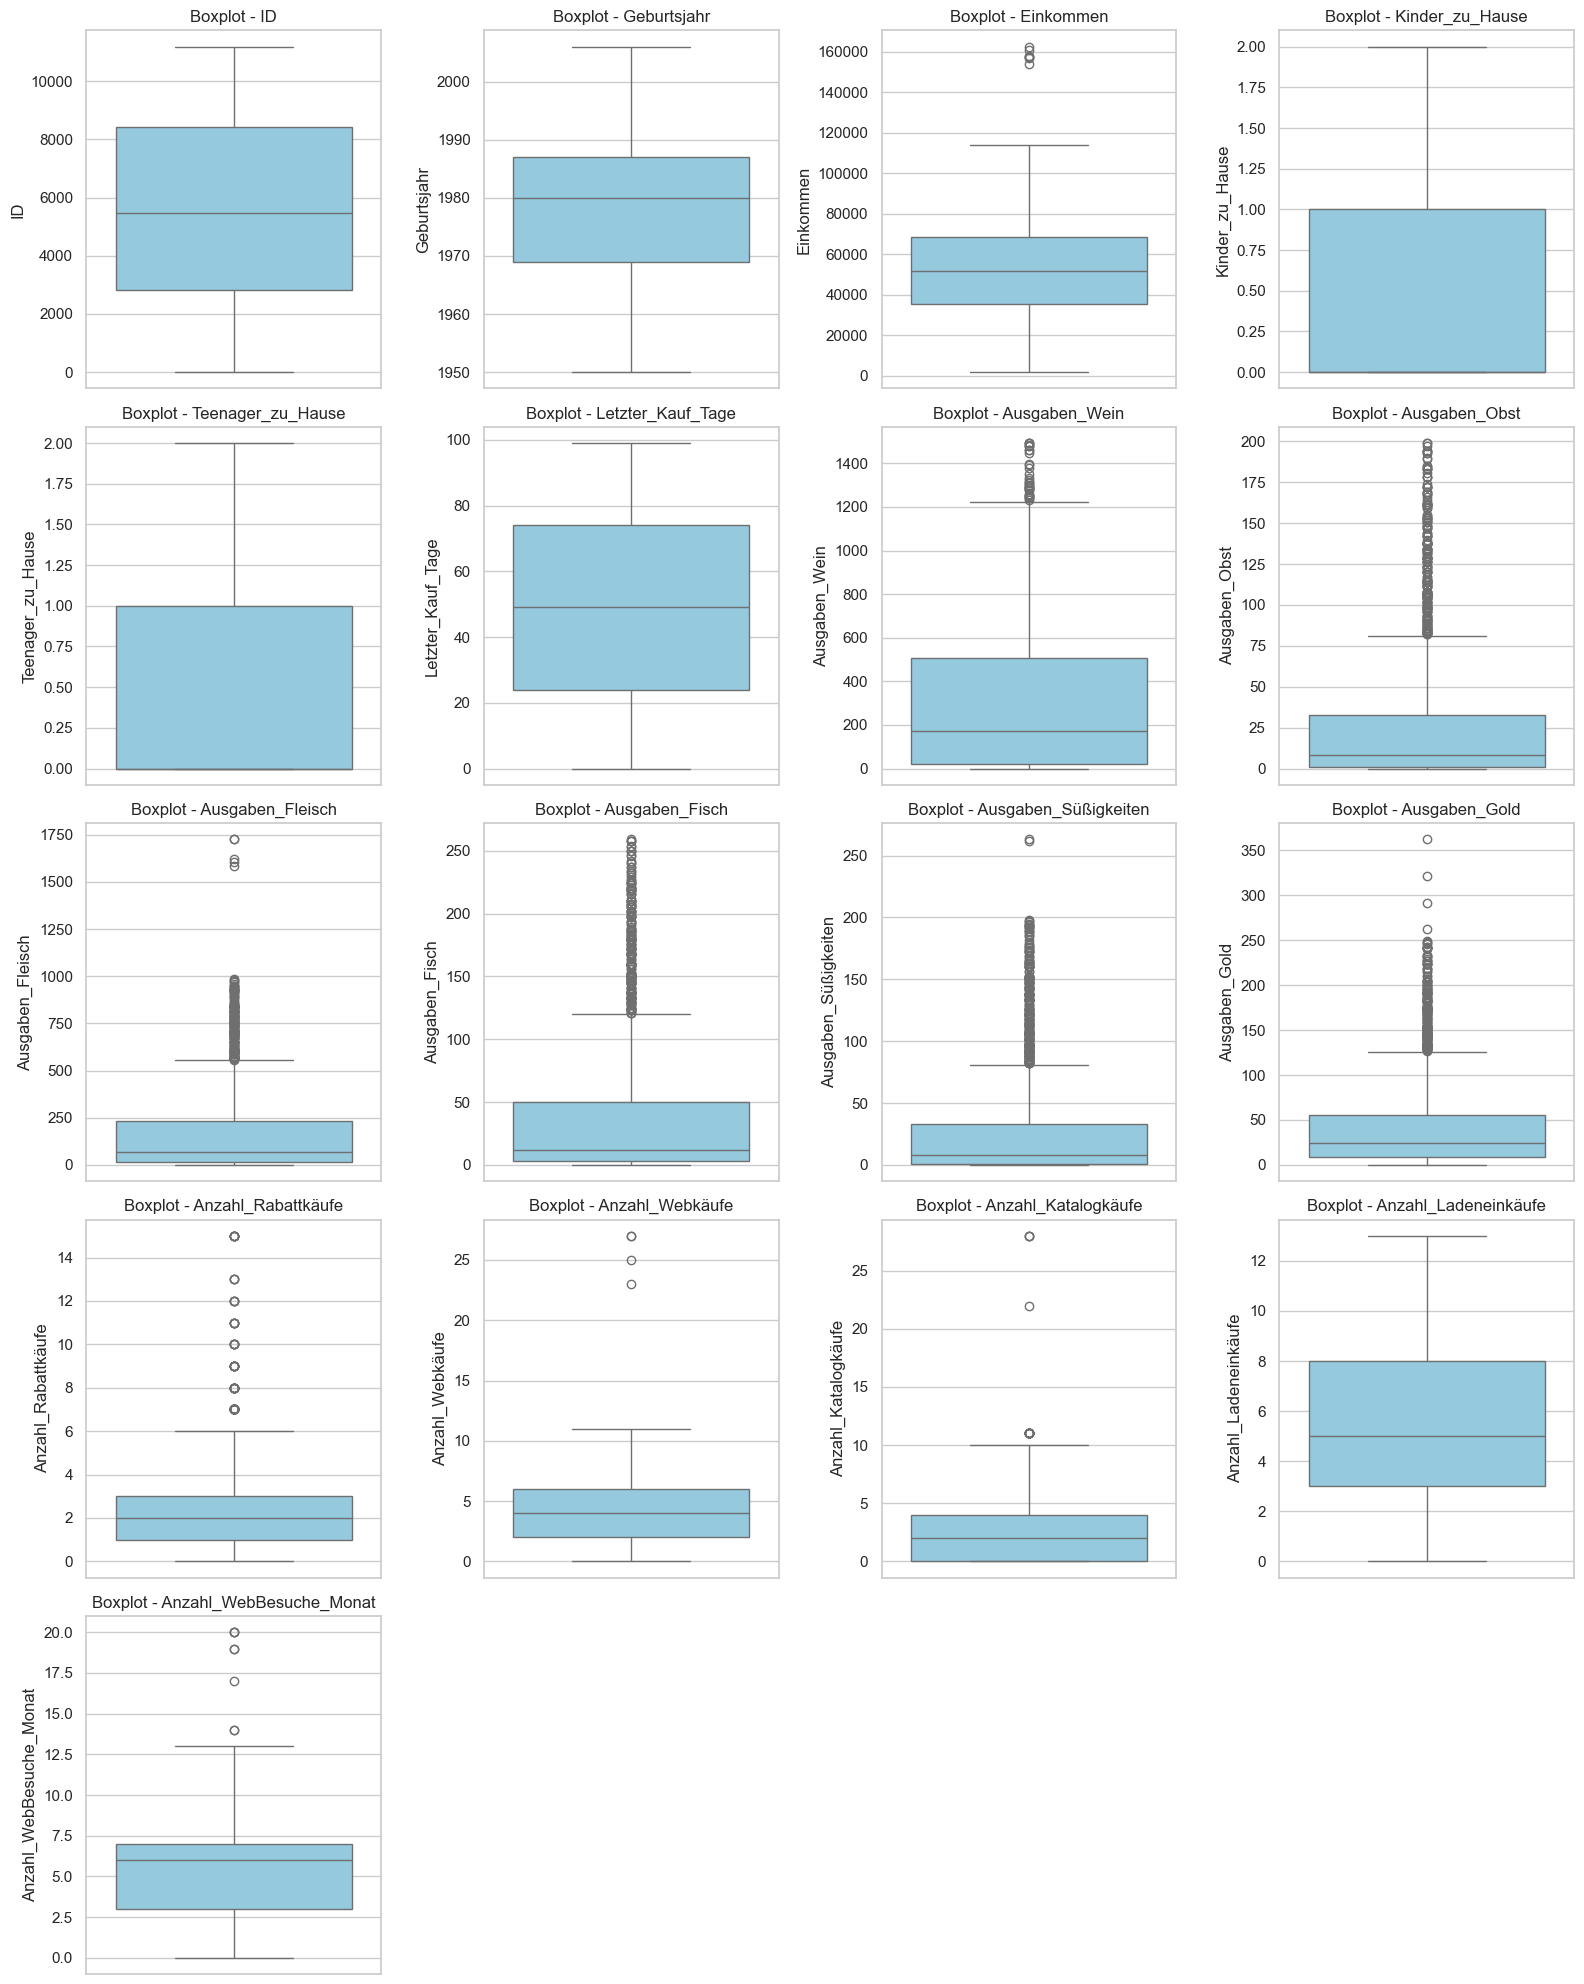

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\423148581.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='pastel')


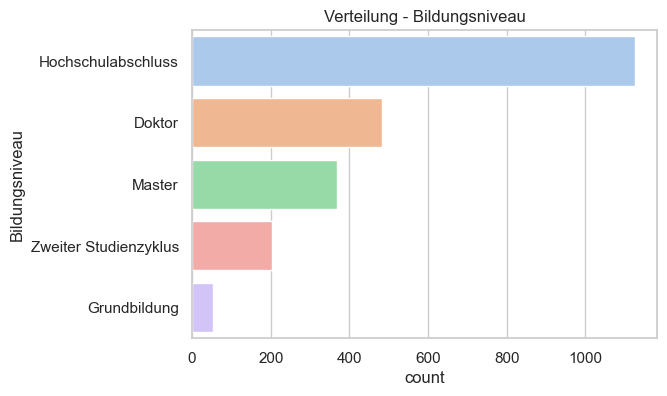

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\423148581.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='pastel')


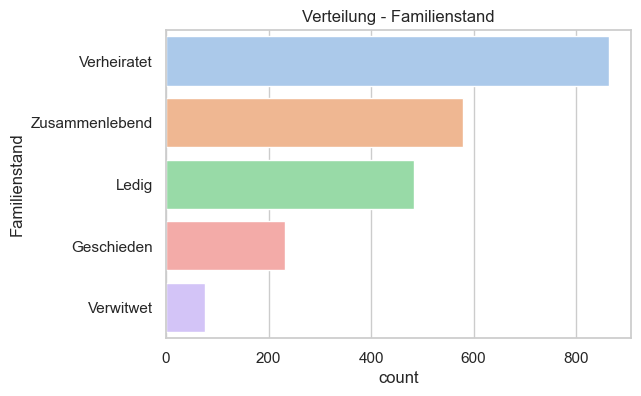

In [39]:
sns.set(style='whitegrid')      # Stil einstellen
plt.rcParams['figure.dpi'] = 100

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()      # Numerische Spalten identifizieren
cat_cols = df.select_dtypes(include=['object']).columns.tolist()                # Kategoriale Spalten identifizieren

num_cols = [col for col in num_cols if df[col].nunique() > 2]                   # Binäre Variablen herausfiltern

print('Numerische Spalten:', num_cols)
print('Kategorische Spalten:', cat_cols)

df[num_cols].hist(bins=20, figsize=(16, 12), edgecolor='black')                 # Histogramme für numerische Variablen
plt.suptitle('Histogramme aller numerischen Variablen', fontsize=16)
plt.show()

n = len(num_cols)                                   # Boxplots für numerische Variablen (Ausreißer-Erkennung)
rows = (n // 4) +1                                  # Das ist eine Ganzzahldivision zum Ermitteln der Zeilen; +1 damit der Rest auch Platz hat                   
plt.figure(figsize=(16, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

pairplot_cols = [col for col in num_cols if col !='ID']             # Für Pairplot nur echte Features (ohne ID) auswählen
if len(pairplot_cols) <= 8:
    sample_df = df[pairplot_cols].sample(300, random_state=42)      # Um Performance zu verbessern: nur eine Stichprobe von 300 Zeilen
    g = sns.pairplot(sample_df, diag_kind='hist', plot_kws={'alpha':0.6}, height=1.0)
    plt.suptitle('Pairplot der numeriscehn Features', y=1.02, fontsize=12)
    plt.show()


for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='pastel')
    plt.title(f'Verteilung - {col}')
    plt.show()

### Histrogramme:
##### Einkommen ist rechtsschief verteilt, die meisten Kunden haben weniger als 100.000 €, wenige mehr
##### Ausgaben (Wein, Fleisch etc) sind stark rechtsschief, die meisten Kunden geben sehr wenig oder nichts aus, wenige Kunden sehr viel
##### Anzahl Käufe (Web, Katalog etc) haben kleine Werte, die meisten Kunden kaufen selten, wenige Kunden sehr oft
##### Letzter_Kauf hat eine breite Streuung, einige Kunden sind sehr aktiv, ander haben lange nichts gekauft
##### Die meisten haben keine Kinder und einige wenige nur 1 oder 2
### Boxplots:
##### Beim Einkommen gibt es starke Ausreißer nach oben, vielleicht reale Top-Verdiener.
##### Ausgaben-Spalten haben viele Ausreißer, typische Konsumverteilung
##### Bei den Kaufkanälen zeigen sich deutliche Unterschiede. Ladenkäufe sind stabil, es gibt keine Ausreißer, wobei alle anderen Kaufkanäle Ausreißer haben, vielleicht durch Power-Shopper bedingt
### Fazit:
##### Die Kunden sind überwiegend gut gebildet und verheiratet bzw. zusammenlebend. Einkommen und Ausgaben zeigen eine rechtsschiefe Verteilung, d.h. es gibt viele Kunden mit niedrigen bis mittleren Erten und wenige Ausreißer mit extrem hohen Beträgen.

## Exploration
##### Korrelationen untersuchen, Segment-Vergleiche, Gruppen-Profile, Cluster-Tendenzen prüfen, Visualisierungen

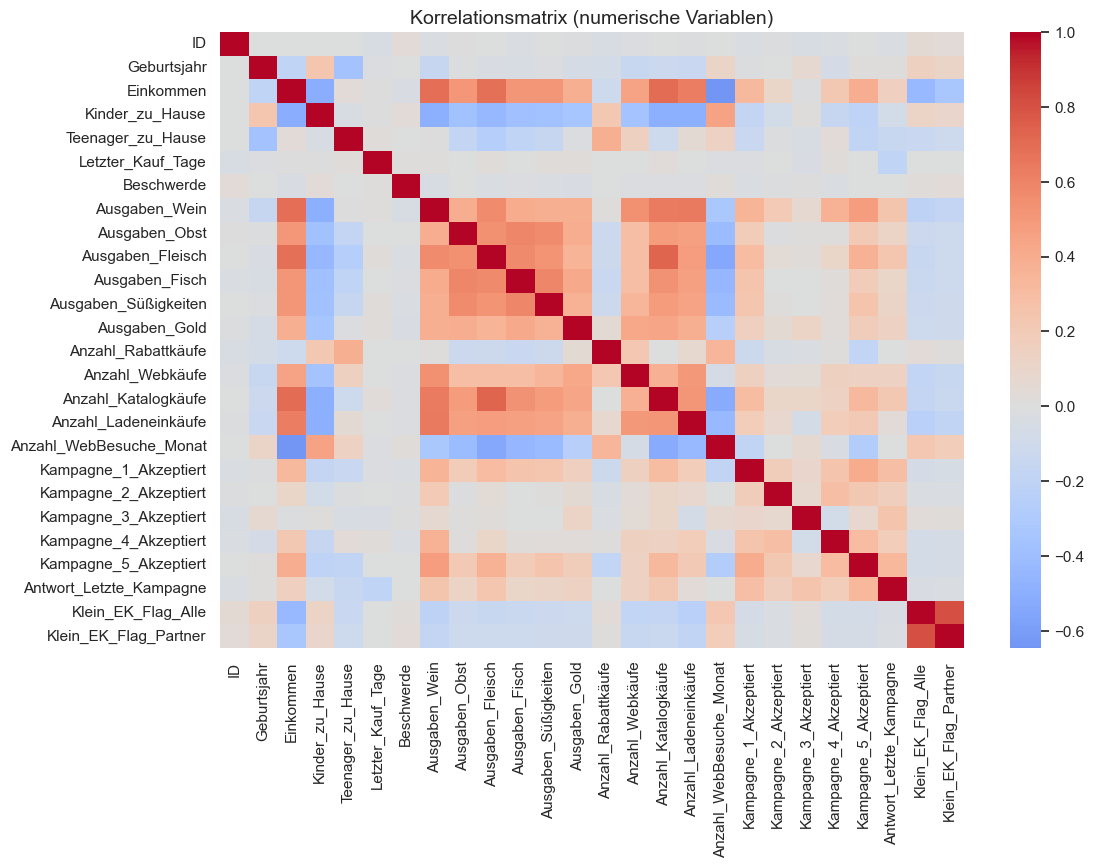

In [40]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns           # Nur numerische Spalten auswählen

corr = df[num_cols].corr()            # Korrelationsmatrix berechnen

plt.figure(figsize=(12, 8))                                     # Heatmap plotten
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)       # annot zum Anzeigen der Zahlen in der Heatmap oder eben nur Farben
plt.title('Korrelationsmatrix (numerische Variablen)', fontsize=14)
plt.show()

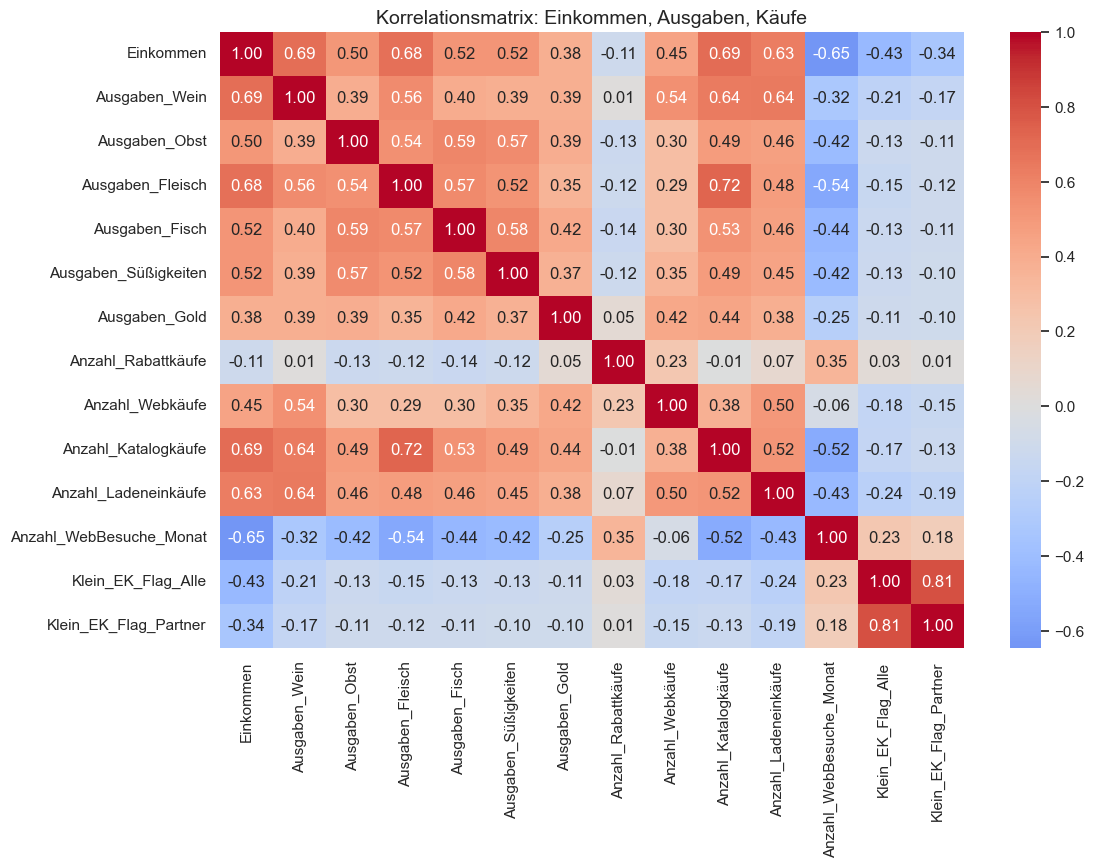

In [41]:
focus_cols = [col for col in df.columns         # Nur relevante Spalte auswählen zur besseren Übersicht
              if('Einkommen' in col)
              or('Ausgaben' in col)
              or('Anzahl' in col)
              or('WEbbesuche' in col)
              or('Klein_EK' in col)]

corr = df[focus_cols].corr()            # Korrelationsmatrix berechnen

plt.figure(figsize=(12, 8))                                   # Heatmap plotten
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Korrelationsmatrix: Einkommen, Ausgaben, Käufe', fontsize=14)
plt.show()

## Einkommen nach Familienstand

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\2620255324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Familienstand', y='Einkommen', data=df, palette='Set2')


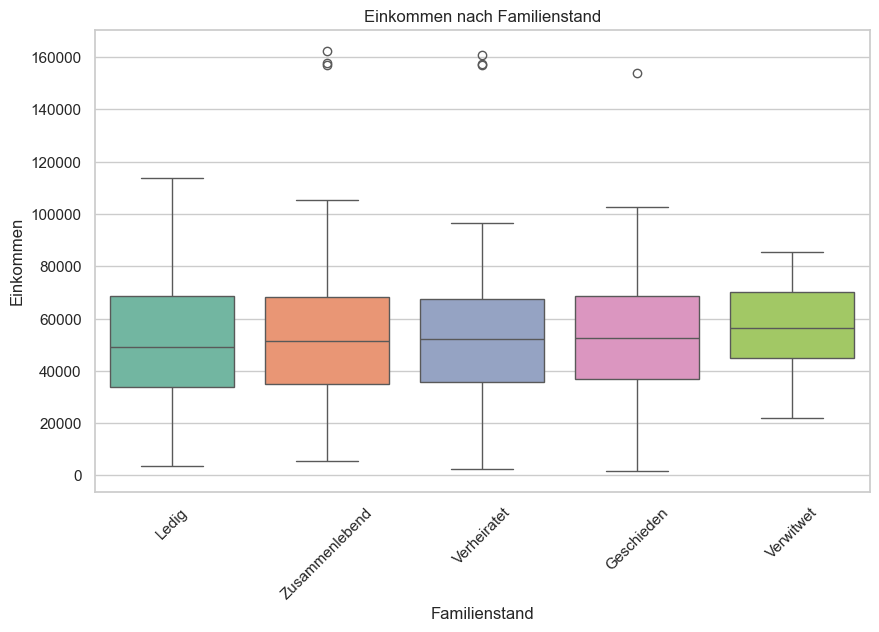

Median-Einkommen pro Familienstand:
<bound method Series.sort_values of Familienstand
Geschieden        52683.0
Ledig             49090.0
Verheiratet       52028.5
Verwitwet         56551.0
Zusammenlebend    51342.0
Name: Einkommen, dtype: float64>

Median-Gesamtausgaben pro Familienstand:
Familienstand
Ledig             354.0
Zusammenlebend    393.5
Geschieden        395.0
Verheiratet       396.5
Verwitwet         636.0
Name: Gesamtausgaben, dtype: float64

Median-Ausgaben nach Anzahl Kinder:
Kinder_zu_Hause
0    904.0
1     72.0
2     65.5
Name: Gesamtausgaben, dtype: float64

Median_Ausgaben nach Anzahl Teenager:
Teenager_zu_Hause
0    381.0
1    394.0
2    458.5
Name: Gesamtausgaben, dtype: float64

Median-Ausgaben nach Gesamtzahl Kinder und Teenager im Haushalt:
Kinder_Teenager_gesamt
0    1189.5
1     302.5
2      93.0
3      88.0
Name: Gesamtausgaben, dtype: float64
Median-Ausgaben für Lebensmittel nach Anzahl Kinder und Teenager:
                        Ausgaben_Obst  Ausgaben_

In [42]:
plt.figure(figsize=(10, 6))                                             # Boxplot Einkommen nach Familienstand
sns.boxplot(x='Familienstand', y='Einkommen', data=df, palette='Set2')
plt.title('Einkommen nach Familienstand')
plt.xticks(rotation=45)
plt.show()

median_ek_fam = df.groupby('Familienstand')['Einkommen'].median().sort_values       # Median-Einkommen pro Familienstand
print('Median-Einkommen pro Familienstand:')
print(median_ek_fam)

ausgaben_cols = [col for col in df.columns if 'Ausgaben' in col]        # Median-Ausgaben gesamt nach Familienstand
df['Gesamtausgaben'] = df[ausgaben_cols].sum(axis=1)                   # Neue Spalte Gesamtausgaben erstellt

median_ausgaben_fam = df.groupby('Familienstand')['Gesamtausgaben'].median().sort_values()
print('\nMedian-Gesamtausgaben pro Familienstand:')
print(median_ausgaben_fam)

print('\nMedian-Ausgaben nach Anzahl Kinder:')                            # Median-Ausgaben nach Kindern
print(df.groupby('Kinder_zu_Hause')['Gesamtausgaben'].median())

print('\nMedian_Ausgaben nach Anzahl Teenager:')                        # Median-Ausgaben nach Teenager
print(df.groupby('Teenager_zu_Hause')['Gesamtausgaben'].median())

df['Kinder_Teenager_gesamt'] = df['Kinder_zu_Hause'] + df['Teenager_zu_Hause']        # Neue Spalte: Gesamtzahl Kinder und Teenager

median_kind_teen = df.groupby('Kinder_Teenager_gesamt')['Gesamtausgaben'].median()    # Median-Ausgaben nach Gesamtzahl Nachwuchs
print('\nMedian-Ausgaben nach Gesamtzahl Kinder und Teenager im Haushalt:')
print(median_kind_teen)

food_cols = ['Ausgaben_Obst', 'Ausgaben_Fleisch', 'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten']

median_food_kids = df.groupby('Kinder_Teenager_gesamt')[food_cols].median()         # Median-Ausgaben nur für Food nach Gesamtzahl <Nachwuchs
print('Median-Ausgaben für Lebensmittel nach Anzahl Kinder und Teenager:')
print(median_food_kids)

for flag in ['Klein_EK_Flag_Alle', 'Klein_EK_Flag_Partner']:
    print(f'\nMedian-Ausgaben für {flag}:')
    print(df.groupby(flag)['Gesamtausgaben'].median())

## Einkommen nach Bildungsniveau

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\3873136872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Bildungsniveau', y='Einkommen', data=df, palette='Set3')


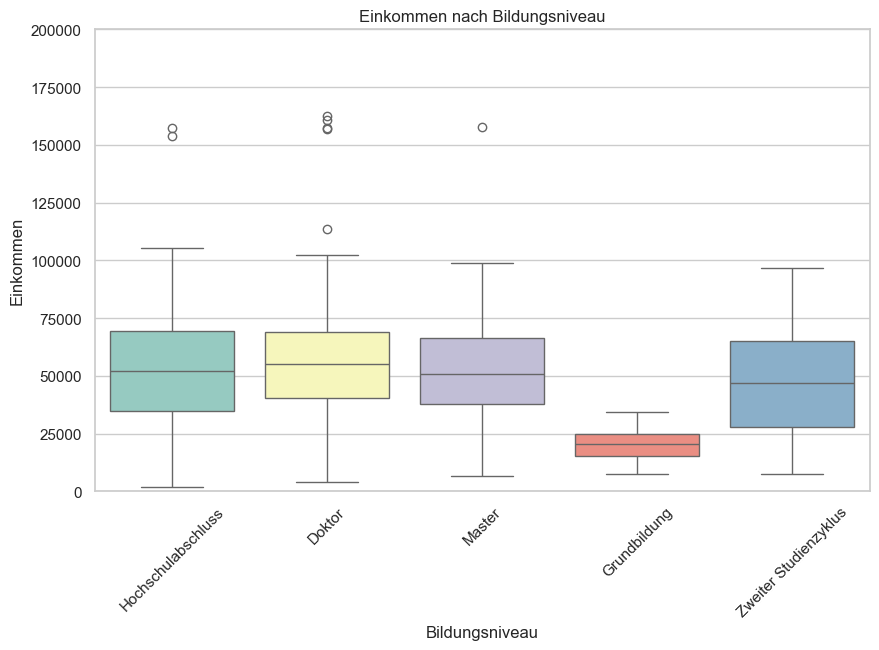

Median-Einkommen nach Bildungsniveau:
Bildungsniveau
Doktor                   55212.0
Grundbildung             20744.0
Hochschulabschluss       52028.5
Master                   50943.0
Zweiter Studienzyklus    46805.0
Name: Einkommen, dtype: float64

Median-Ausgaben nach Bildungsniveau:
Bildungsniveau
Doktor                   494.0
Grundbildung              57.0
Hochschulabschluss       414.0
Master                   385.0
Zweiter Studienzyklus    198.0
Name: Gesamtausgaben, dtype: float64


In [43]:
plt.figure(figsize=(10, 6))                     # Boxplot Einkommen nach Bildungsniveau
sns.boxplot(x='Bildungsniveau', y='Einkommen', data=df, palette='Set3')
plt.title('Einkommen nach Bildungsniveau')
plt.xticks(rotation=45)
plt.ylim(0, 200000)
plt.show()

median_ek_edu = df.groupby('Bildungsniveau')['Einkommen'].median()              # Median Einkommen pro Bildungsniveau
median_ausgaben_edu = df.groupby('Bildungsniveau')['Gesamtausgaben'].median()   # Median Ausgaben pro Bildungsniveau

print('Median-Einkommen nach Bildungsniveau:')
print(median_ek_edu)

print('\nMedian-Ausgaben nach Bildungsniveau:')
print(median_ausgaben_edu)

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\1648912299.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_ek_sorted.index, y=median_ek_sorted.values, palette='Set3', ax=ax[0])
C:\Users\thort\AppData\Local\Temp\ipykernel_15000\1648912299.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
C:\Users\thort\AppData\Local\Temp\ipykernel_15000\1648912299.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_ausgaben_sorted.index, y=median_ausgaben_sorted.values, palette='Set3', ax=ax[1])


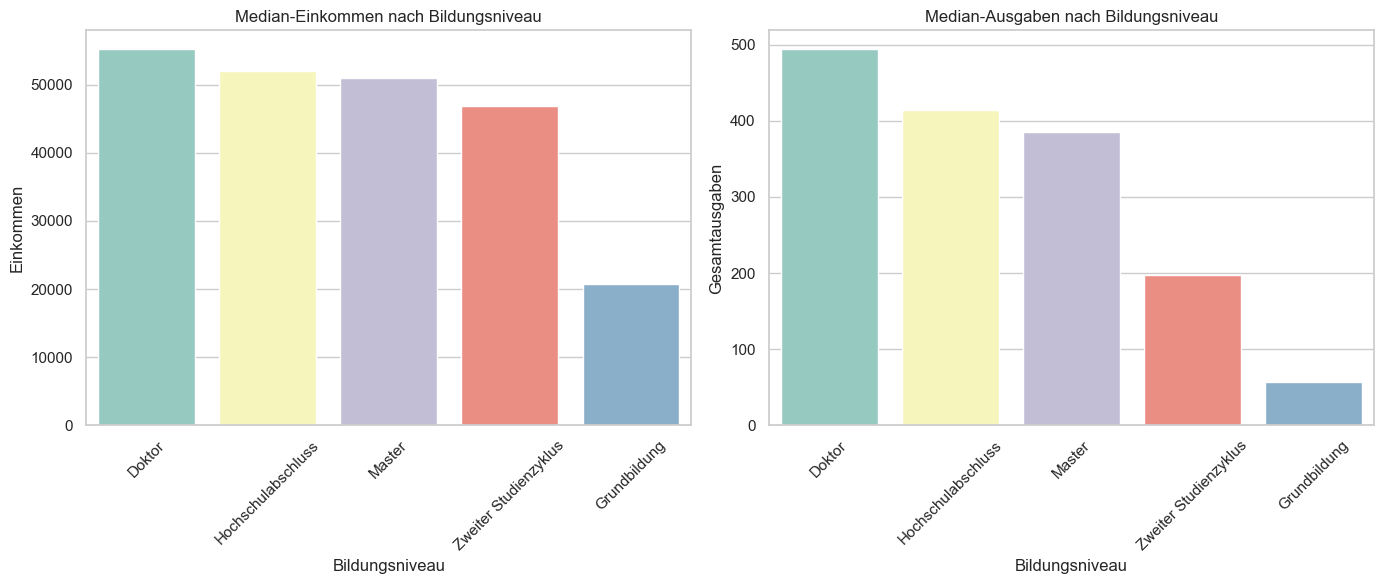

In [44]:
median_ek_sorted = median_ek_edu.sort_values(ascending=False)       # Einkommen sortieren von hoch nach tief

median_ausgaben_sorted = median_ausgaben_edu.sort_values(ascending=False)       # Ausgaben sortieren von hoch nach tief

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=median_ek_sorted.index, y=median_ek_sorted.values, palette='Set3', ax=ax[0])
ax[0].set_title('Median-Einkommen nach Bildungsniveau')
ax[0].set_ylabel('Einkommen')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(x=median_ausgaben_sorted.index, y=median_ausgaben_sorted.values, palette='Set3', ax=ax[1])
ax[1].set_title('Median-Ausgaben nach Bildungsniveau')
ax[1].set_ylabel('Gesamtausgaben')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ausgaben nach Bildung, Familienstand und Kindern

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\1324258919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_kind_teen.index, y=median_kind_teen.values, palette='Set2')


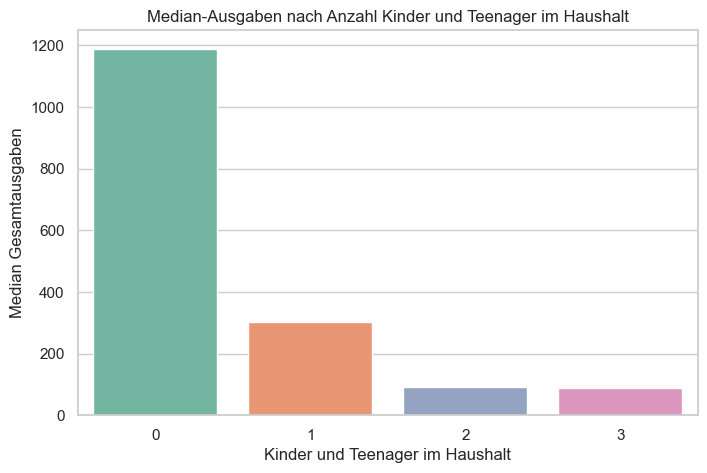

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(x=median_kind_teen.index, y=median_kind_teen.values, palette='Set2')
plt.title('Median-Ausgaben nach Anzahl Kinder und Teenager im Haushalt')
plt.xlabel('Kinder und Teenager im Haushalt')
plt.ylabel('Median Gesamtausgaben')
plt.show()

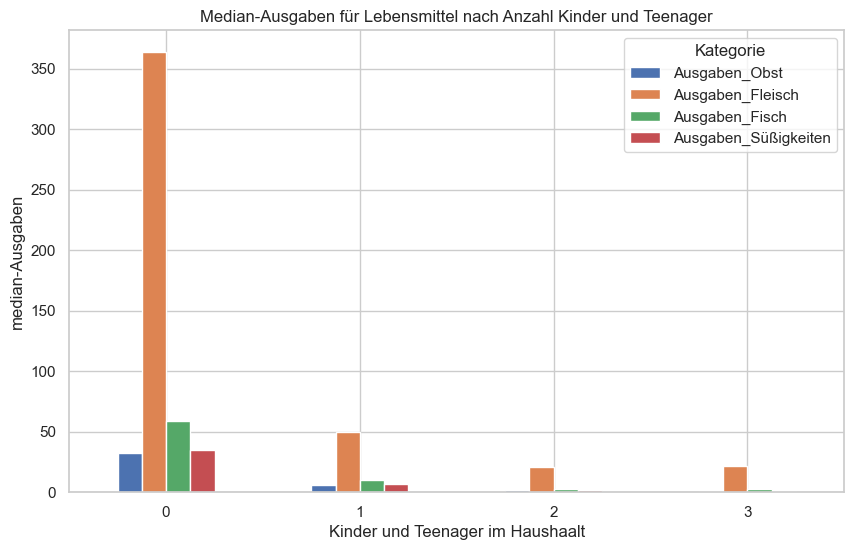

In [46]:
median_food_kids.plot(kind='bar', figsize=(10, 6))
plt.title('Median-Ausgaben für Lebensmittel nach Anzahl Kinder und Teenager')
plt.ylabel('median-Ausgaben')
plt.xlabel('Kinder und Teenager im Haushaalt')
plt.xticks(rotation=0)
plt.legend(title='Kategorie')
plt.show()

## Kaufkanäle

Median Käufe pro Kaufart:
Anzahl_Webkäufe         4.0
Anzahl_Katalogkäufe     2.0
Anzahl_Ladeneinkäufe    5.0
Anzahl_Rabattkäufe      2.0
dtype: float64


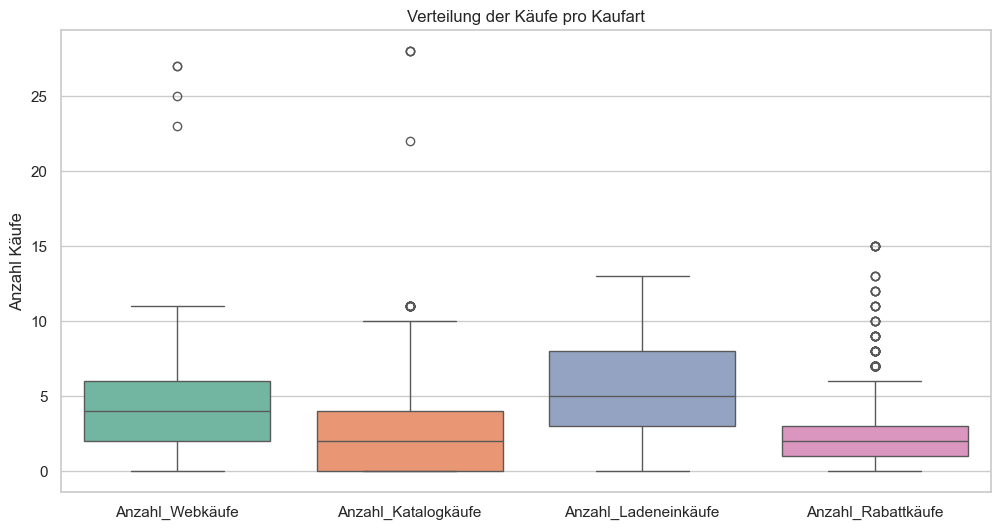

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\2133985281.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', ax=ax)
C:\Users\thort\AppData\Local\Temp\ipykernel_15000\2133985281.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', ax=ax)
C:\Users\thort\AppData\Local\Temp\ipykernel_15000\2133985281.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2', ax=ax)
C:\Users\thort\AppData\Local\Temp\ipykernel_15000\2133985281.py:18: FutureWarning:

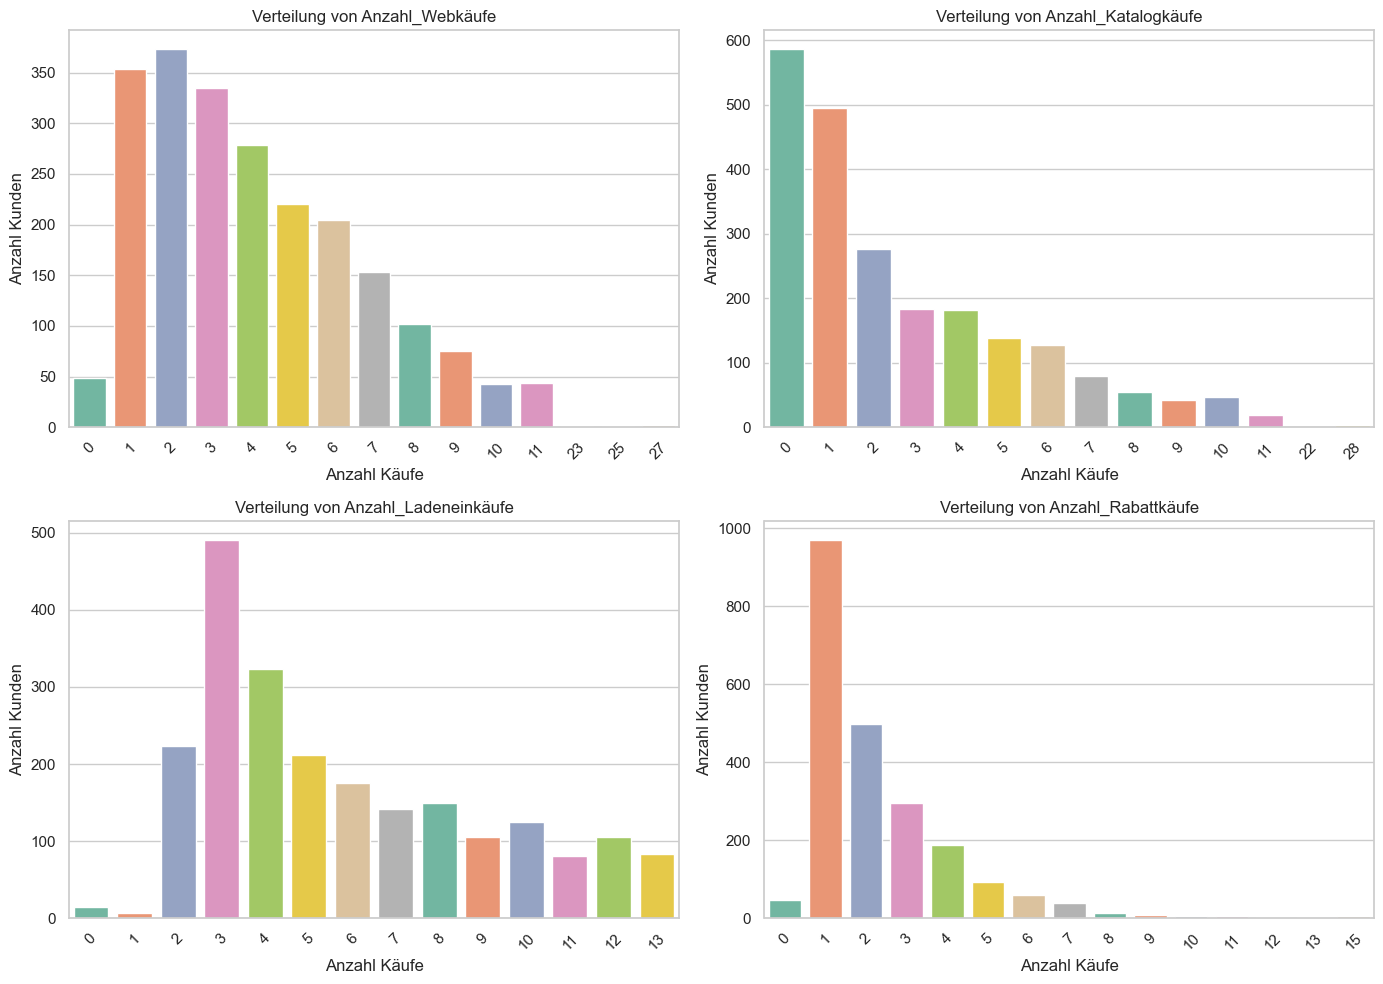

In [47]:
median_kanaele = df[['Anzahl_Webkäufe', 'Anzahl_Katalogkäufe', 
                    'Anzahl_Ladeneinkäufe', 'Anzahl_Rabattkäufe']].median()     # Median Käufe pro Kanal
print('Median Käufe pro Kaufart:')
print(median_kanaele)

plt.figure(figsize=(12, 6))                     # Boxplots für alle Kaufarten
sns.boxplot(data=df[['Anzahl_Webkäufe', 'Anzahl_Katalogkäufe', 
                    'Anzahl_Ladeneinkäufe', 'Anzahl_Rabattkäufe']], palette='Set2')
plt.title('Verteilung der Käufe pro Kaufart')
plt.ylabel('Anzahl Käufe')
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))            # Countplots für alle Kaufarten

kaufarten = ['Anzahl_Webkäufe', 'Anzahl_Katalogkäufe', 'Anzahl_Ladeneinkäufe', 'Anzahl_Rabattkäufe']

for ax, col in zip(axes.flatten(), kaufarten):
    sns.countplot(x=col, data=df, palette='Set2', ax=ax)
    ax.set_title(f'Verteilung von {col}')
    ax.set_xlabel('Anzahl Käufe')
    ax.set_ylabel('Anzahl Kunden')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [48]:
df.loc[df['Anzahl_Katalogkäufe'] > 0, ['Anzahl_Ladeneinkäufe', 'Anzahl_Webkäufe', 'Anzahl_Rabattkäufe']].median()

Anzahl_Ladeneinkäufe    6.0
Anzahl_Webkäufe         5.0
Anzahl_Rabattkäufe      2.0
dtype: float64

In [49]:
vergleich = pd.DataFrame({                          # Vergleich Katalognutzer vs. Nicht-Katalognutzer
    'Katalognutzer (>0)': df.loc[df['Anzahl_Katalogkäufe'] > 0,
                                 ['Anzahl_Ladeneinkäufe', 'Anzahl_Webkäufe', 'Anzahl_Rabattkäufe']].median(),
    'Nicht-Katalognutzer (0)': df.loc[df['Anzahl_Katalogkäufe'] == 0,
                                      ['Anzahl_Ladeneinkäufe', 'Anzahl_Webkäufe', 'Anzahl_Rabattkäufe']].median()                            
    })

print('Median-Vergleich Katalognutzer vs. Nicht-Katalognutzer')
display(vergleich)

Median-Vergleich Katalognutzer vs. Nicht-Katalognutzer


,Katalognutzer (>0),Nicht-Katalognutzer (0)
Anzahl_Ladeneinkäufe,6.0,3.0
Anzahl_Webkäufe,5.0,1.0
Anzahl_Rabattkäufe,2.0,1.0


In [50]:
kaufarten = ["Anzahl_Webkäufe", "Anzahl_Katalogkäufe", "Anzahl_Ladeneinkäufe", "Anzahl_Rabattkäufe"]    # Kanäle definieren

vergleiche = {}         # Vergleich für alle Kanäle erstellen

for col in kaufarten:                       # Vergleich für alle Kanäle erstellen
    vergleiche[col] = pd.DataFrame({
        f'{col} Nutzer (>0)': df.loc[df[col] > 0, kaufarten].median(),
        f'{col} Nichtnutzer (0)': df.loc[df[col] == 0, kaufarten].median()
    })

for col, tabelle in vergleiche.items():
    print(f'\n=== Median-Vergleich: {col} ===')
    display(tabelle)


=== Median-Vergleich: Anzahl_Webkäufe ===


,Anzahl_Webkäufe Nutzer (>0),Anzahl_Webkäufe Nichtnutzer (0)
Anzahl_Webkäufe,4.0,0.0
Anzahl_Katalogkäufe,2.0,0.0
Anzahl_Ladeneinkäufe,5.0,3.0
Anzahl_Rabattkäufe,2.0,1.0



=== Median-Vergleich: Anzahl_Katalogkäufe ===


,Anzahl_Katalogkäufe Nutzer (>0),Anzahl_Katalogkäufe Nichtnutzer (0)
Anzahl_Webkäufe,5.0,1.0
Anzahl_Katalogkäufe,3.0,0.0
Anzahl_Ladeneinkäufe,6.0,3.0
Anzahl_Rabattkäufe,2.0,1.0



=== Median-Vergleich: Anzahl_Ladeneinkäufe ===


,Anzahl_Ladeneinkäufe Nutzer (>0),Anzahl_Ladeneinkäufe Nichtnutzer (0)
Anzahl_Webkäufe,4.0,0.0
Anzahl_Katalogkäufe,2.0,0.0
Anzahl_Ladeneinkäufe,5.0,0.0
Anzahl_Rabattkäufe,2.0,0.0



=== Median-Vergleich: Anzahl_Rabattkäufe ===


,Anzahl_Rabattkäufe Nutzer (>0),Anzahl_Rabattkäufe Nichtnutzer (0)
Anzahl_Webkäufe,3.0,5.0
Anzahl_Katalogkäufe,2.0,6.0
Anzahl_Ladeneinkäufe,5.0,5.5
Anzahl_Rabattkäufe,2.0,0.0


## Kaufkanäle
##### Ladenkäufe: Der Laden ist die Basis. Wer den Laden nicht kennt, kauft in keinem anderen Kanal. Käufer im Laden kaufen jedoch zusätzlich auch über Web, Katalog und Rabatt.   
##### Webkäufe: Webkäufer kaufen viel im Laden und nutzen auch Katalog und Rabattaktionen. Nicht-Webnutzer kaufen fast nur im Laden, gelegentlich mal mit Rabatt, bleiben sonst aber inaktiv. Webnutzer sind typische Multikanal-Kunden.   
##### Katalognutzer: Katalogkunden sind Heavy Shopper. Sie nutzen alle Kanäle intensiv und gehören zu den Premiumkunden. Nicht-Katalognutzer kaufen hauptsächlich im Laden, nutzen weniger Rabatte und seltener das Web.  
##### Rabattkäufer: Rabattnutzer kaufen ebenfalls über alle Kanäle, aber nicht ganz so intensiv wie Katalogkunden. Überraschend ist, dass auch viele Nicht-Rabattnutzer sehr aktiv in allen anderen Kanälen einkaufen. Rabatte sind eher ein Verstärker als ein Einstiegskanal.

,Kanal,Gruppe,Anzahl_Webkäufe,Anzahl_Katalogkäufe,Anzahl_Ladeneinkäufe,Anzahl_Rabattkäufe
0,Anzahl_Webkäufe,Nutzer (>0),4.0,2.0,5.0,2.0
1,Anzahl_Webkäufe,Nichtnutzer (0),0.0,0.0,3.0,1.0
2,Anzahl_Katalogkäufe,Nutzer (>0),5.0,3.0,6.0,2.0
3,Anzahl_Katalogkäufe,Nichtnutzer (0),1.0,0.0,3.0,1.0
4,Anzahl_Ladeneinkäufe,Nutzer (>0),4.0,2.0,5.0,2.0
5,Anzahl_Ladeneinkäufe,Nichtnutzer (0),0.0,0.0,0.0,0.0
6,Anzahl_Rabattkäufe,Nutzer (>0),3.0,2.0,5.0,2.0
7,Anzahl_Rabattkäufe,Nichtnutzer (0),5.0,6.0,5.5,0.0


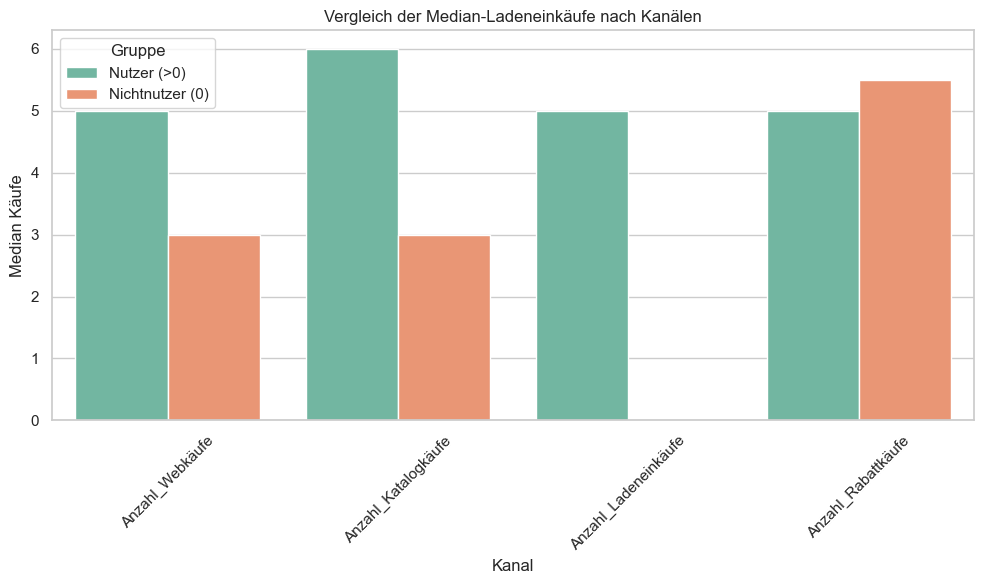

In [93]:
rows = []                               # Ergebnisse als Liste sammeln

for col in kaufarten:                       # Balkendiagramm Nutzer vs, Nichtnutzer pro Kanal
    median_nutzer = df.loc[df[col] > 0, kaufarten].median()
    median_nichtnutzer = df.loc[df[col] == 0, kaufarten].median()

    rows.append(pd.DataFrame({
        'Kanal': col,
        'Gruppe': 'Nutzer (>0)',
        **median_nutzer.to_dict()        # ** steht für unpacking, nimmt alle Key-Value-Paare aus dem Dictionary und fügt sie hier einzeln als Argumente ein
    }, index=[0]))

    rows.append(pd.DataFrame({
        'Kanal': col,
        'Gruppe': 'Nichtnutzer (0)',
        **median_nichtnutzer.to_dict()
    }, index=[0]))

vergleich_df = pd.concat(rows, ignore_index=True)           # Alles zusammenführen

display(vergleich_df)

plt.figure(figsize=(10, 6))                 # Nur die Spalte des jeweiligen Kanals (eigener Median) visualisieren
sns.barplot(
    data=vergleich_df, x='Kanal', y='Anzahl_Ladeneinkäufe', 
    hue='Gruppe', palette='Set2')           # hue legt fest nach welcher Kategorie farblich unterschieden werden soll
plt.title('Vergleich der Median-Ladeneinkäufe nach Kanälen')
plt.ylabel('Median Käufe')
plt.xticks(rotation=45)
plt.legend(title='Gruppe')
plt.tight_layout()
plt.show()

## Kampagnen

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\659177382.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=annahmequoten.index, y=annahmequoten.values, palette='viridis')


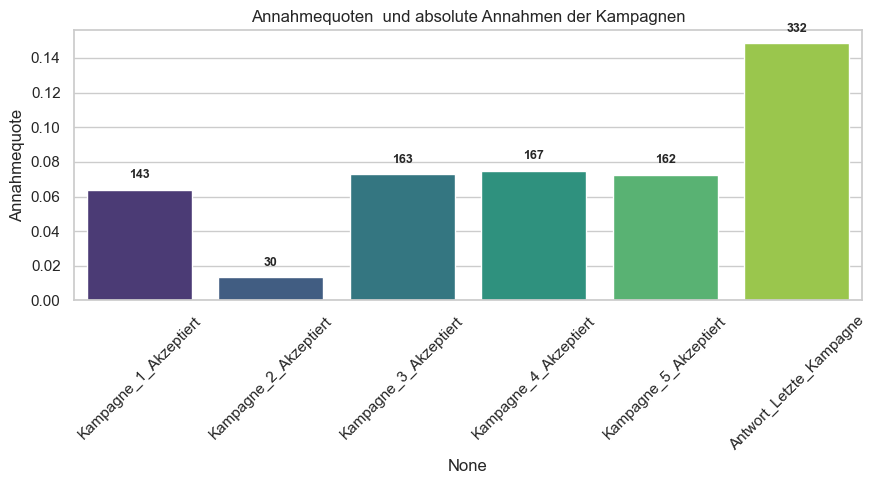

In [52]:
kampagnen = [col for col in df.columns if 'Kampagne' in col]        # Alle Spalten mit Kampagne im Namen einsammeln

kampagnen_sorted = sorted([c for c in kampagnen if 'Antwort' not in c],     # Kampagnen-Spalten sortieren
                          key=lambda x: int(x.split('_')[1])) + ['Antwort_Letzte_Kampagne']

annahmequoten = df[kampagnen_sorted].mean()             # Quoten (Mittelwerte) und absolute Annahmen
annahme_counts = df[kampagnen_sorted].sum()

plt.figure(figsize=(9, 5))              # Plot
ax = sns.barplot(x=annahmequoten.index, y=annahmequoten.values, palette='viridis')

for i, v in enumerate(annahmequoten.values):        # i ist die Position des Balkens und v ist die Höhe des Balkens, enumerate gibt beim Durchlaufen einer
                                                    # Liste den Index und den wert zurück. i ist der index und v der tatsächliche Prozentwert
    ax.text(i, v + 0.005, f'{annahme_counts.iloc[i]}', ha='center', va='bottom',
            fontsize=9, fontweight='bold')
plt.title('Annahmequoten  und absolute Annahmen der Kampagnen')
plt.ylabel('Annahmequote')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\3138460684.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=kampagnen_prozent.index, y=kampagnen_prozent.values, palette='crest')


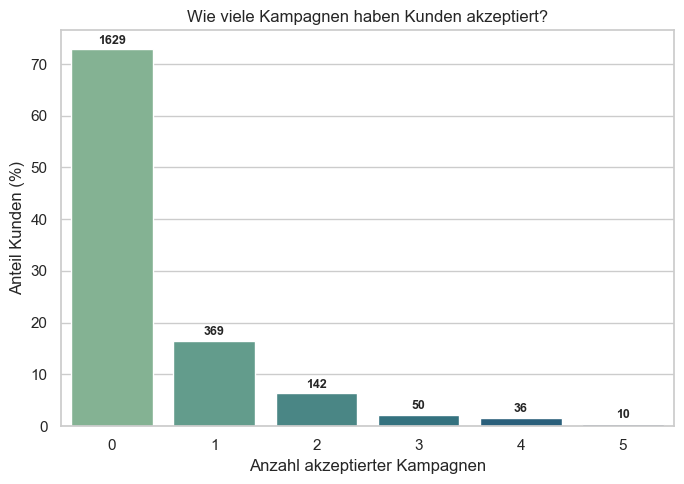

In [53]:
df['Kampagnen_Gesamtannahme'] = df[kampagnen_sorted].max(axis=1)        # Neue Spalte erstellt, ob ein Kunde mindestens eine Kampagne angenommen hat

df['Kampagnen_Anzahl_Akzeptiert'] = df[kampagnen_sorted].sum(axis=1)    # Neue Spalte erstellt, wie viele Kampagnen der Kunde angenommen hat

kampagnen_verteilung = df['Kampagnen_Anzahl_Akzeptiert'].value_counts().sort_index()    # Verteilung der Anzahl akzeptierter Kampagnen (0-6)

kampagnen_prozent = kampagnen_verteilung / len(df) * 100            # in Prozent umrechnen

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=kampagnen_prozent.index, y=kampagnen_prozent.values, palette='crest')

for i, v in enumerate(kampagnen_prozent.values):
    ax.text(i, v + 0.5, f'{kampagnen_verteilung.iloc[i]}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')
    
plt.title('Wie viele Kampagnen haben Kunden akzeptiert?')
plt.xlabel('Anzahl akzeptierter Kampagnen')
plt.ylabel('Anteil Kunden (%)')
plt.tight_layout()
plt.show()




##### Insgesamt gibt es sechs Kampagnen, fünf reguläre und die letzte Antwort_Kampagne- Die letzte hatte die höchste Annahmequote. Die meisten Kunden haben keine Kampagne anngenommen (über 1600 Kunden). Kein Kunde hat alle sechs Kampagnen angenommen.

Grenzen der Einkommens-Tertile: [  1730.  40464.  62845. 162397.]


C:\Users\thort\AppData\Local\Temp\ipykernel_15000\1045394948.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annahmequote_einkommen = df.groupby('Einkommen_Tertil')['Kampagnen_Gesamtannahme'].mean() * 100 # Annahmequote je Einkommens-Tertil
C:\Users\thort\AppData\Local\Temp\ipykernel_15000\1045394948.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=annahmequote_einkommen.index, y=annahmequote_einkommen.values, palette='viridis')


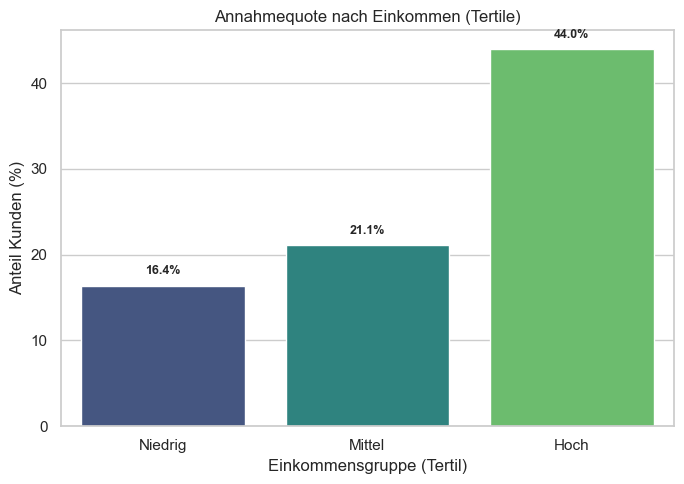

In [54]:
df['Einkommen_Tertil'] = pd.qcut(df['Einkommen'], 3, labels=['Niedrig', 'Mittel', 'Hoch'])  # Neue Spalte Kunden in Einkommens-Tertile einteilen
                            # qcut teilt die Daten in gleich große Gruppen nach Quantilen, also je ein Drittel

einteilung, grenzen = pd.qcut(df['Einkommen'], 3, retbins=True)     # retbins=True gibt die Cut-Offs zurück
print('Grenzen der Einkommens-Tertile:', grenzen)

annahmequote_einkommen = df.groupby('Einkommen_Tertil')['Kampagnen_Gesamtannahme'].mean() * 100 # Annahmequote je Einkommens-Tertil

plt.figure(figsize=(7, 5))              # Plot
ax = sns.barplot(x=annahmequote_einkommen.index, y=annahmequote_einkommen.values, palette='viridis')

for i, v in enumerate(annahmequote_einkommen.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Annahmequote nach Einkommen (Tertile)')
plt.ylabel('Anteil Kunden (%)')
plt.xlabel('Einkommensgruppe (Tertil)')
plt.tight_layout()
plt.show() 

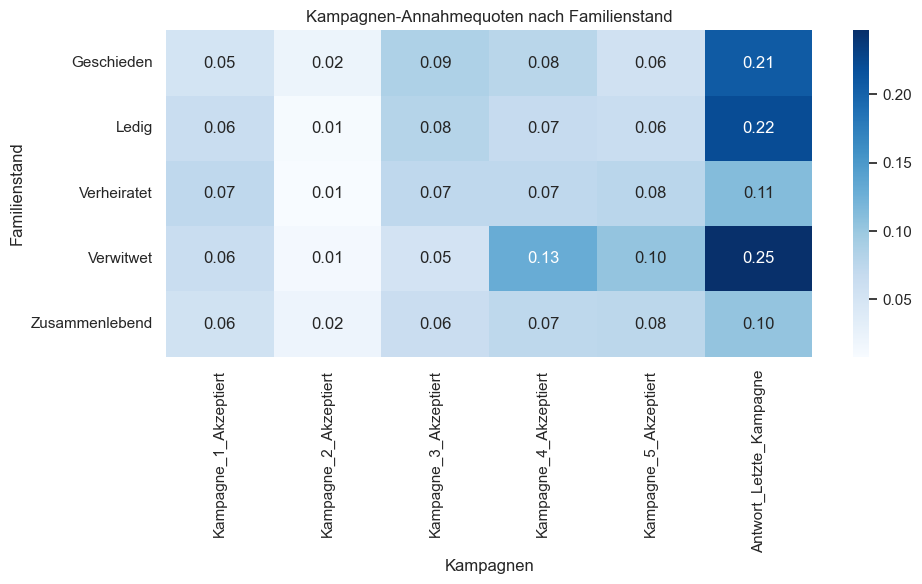

In [55]:
kampagnen_familienstand = df.groupby('Familienstand')[kampagnen_sorted].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(kampagnen_familienstand, annot=True, fmt='.2f', cmap='Blues')
plt.title('Kampagnen-Annahmequoten nach Familienstand')
plt.ylabel('Familienstand')
plt.xlabel('Kampagnen')
plt.tight_layout()
plt.show()

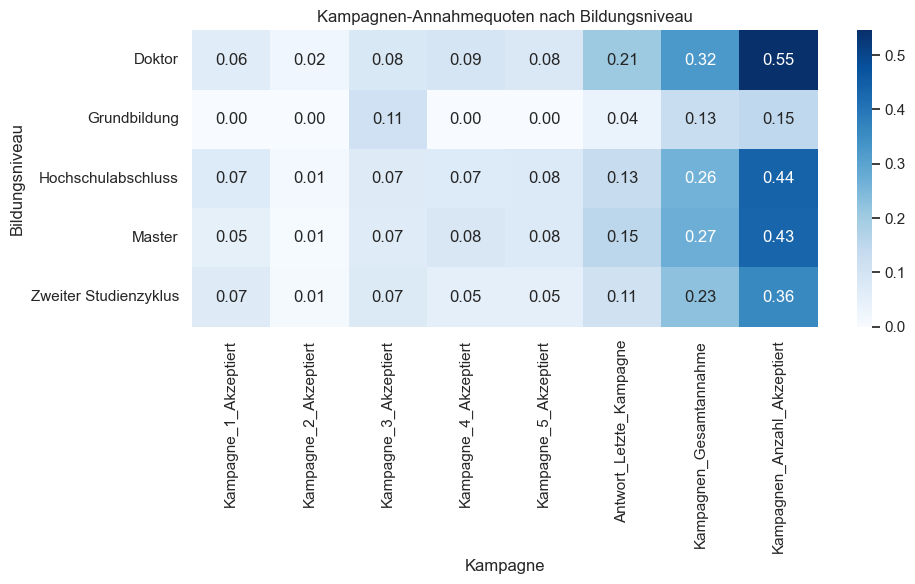

In [56]:
kampagnen = [col for col in df.columns if 'Kampagne' in col]

heatmap_data = df.groupby('Bildungsniveau')[kampagnen].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='Blues')
plt.title('Kampagnen-Annahmequoten nach Bildungsniveau')
plt.ylabel('Bildungsniveau')
plt.xlabel('Kampagne')
plt.tight_layout()
plt.show()

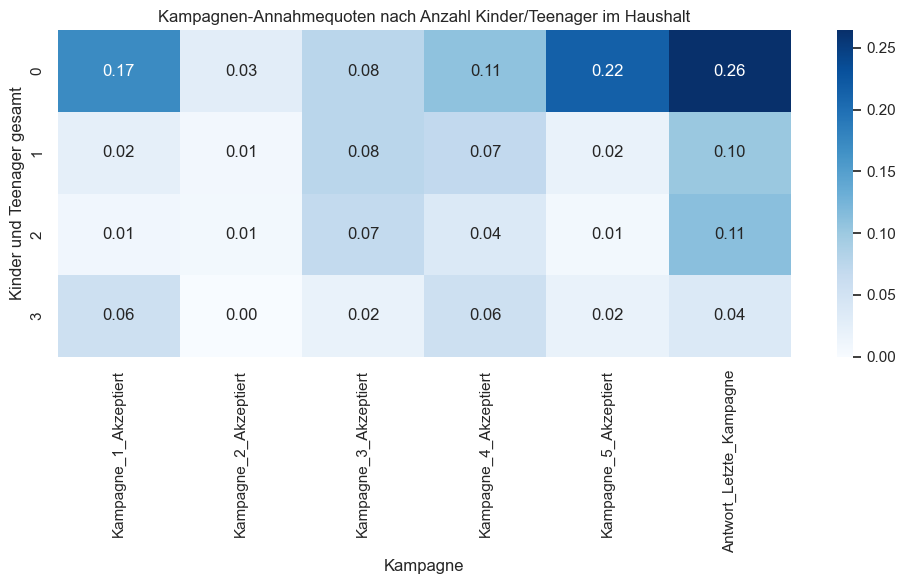

In [57]:
heatmap_data = df.groupby('Kinder_Teenager_gesamt')[kampagnen_sorted].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='Blues')
plt.title('Kampagnen-Annahmequoten nach Anzahl Kinder/Teenager im Haushalt')
plt.ylabel('Kinder und Teenager gesamt')
plt.xlabel('Kampagne')
plt.tight_layout()
plt.show()

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\946067359.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


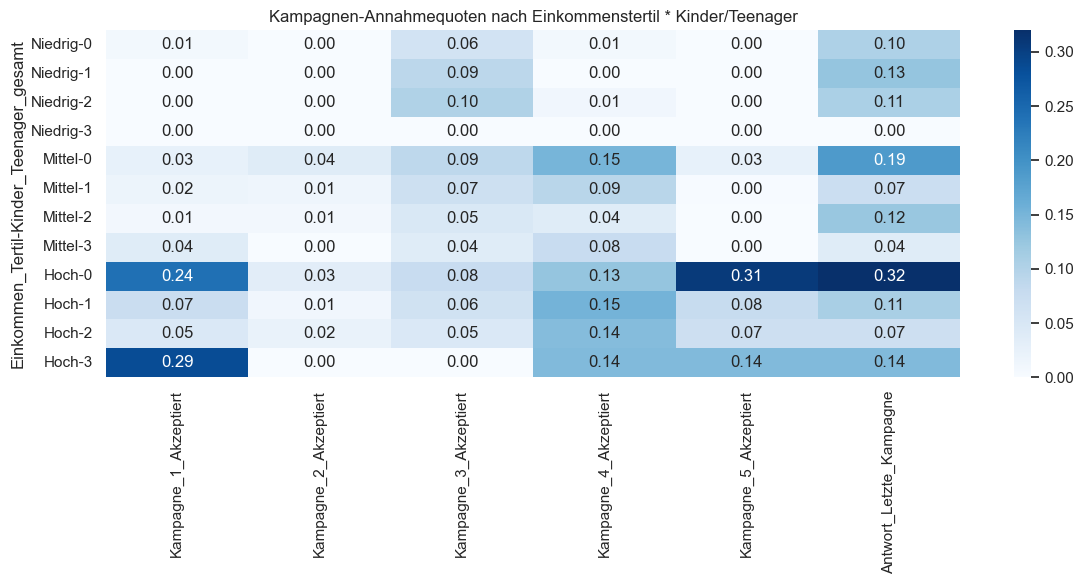

In [58]:
heatmap_data = df.pivot_table(                          
    index=['Einkommen_Tertil', 'Kinder_Teenager_gesamt'],
    values=kampagnen_sorted,                # Liste der Kampagnenspalten
    aggfunc='mean'
)

heatmap_data = heatmap_data[kampagnen_sorted]       # Reihenfolge der Spalten explizit festlegen, weil ich hier eine Pivottabelle benutze

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='Blues')
plt.title('Kampagnen-Annahmequoten nach Einkommenstertil * Kinder/Teenager')
plt.tight_layout()
plt.show()

### Kampagnenanalyse
##### Die letzte Kampagne war am erfolgreichste. Deutlich höhere Annahmequoten als alle vorherigen, daraus folgt ein Zeichen für bessere Ansprache und Angebote. Der Familienstand zählt: Ledige und Verwitwete reagieren stärker auf Kampagnen, Verheiratete/Zusammenlebende sind deutlich zurückhaltender. Bildung mach den Unterschied, denn höhere Bildung, v. a. Doktoren zeigt stark erhöhte Responsivität, Grundbildung reagiert kaum. Kinder hemmen Kampagnenwirkung, denn Haushalte ohne Kinder sind die aktivsten, mit zunehmender Kinderzahl sinkt auch die Annahmequote drastiisch. Die Premium-Zielgruppe sind Personen mit hohem Einkommen und keinen Kindern. Klare Fokusjundengruppe für zukünftiges Marketing

## Recency betrachten, gemeint ist damit Letzter_Kauf_Tage


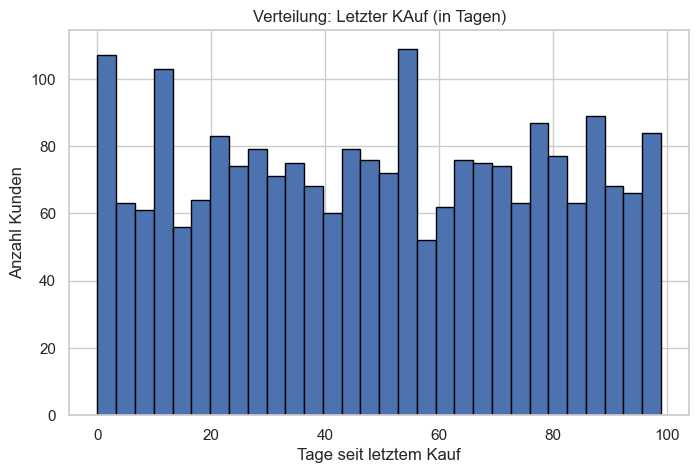

In [59]:
df['Letzter_Kauf_Tage'].plot.hist(bins=30, edgecolor='black', figsize=(8, 5))       # Histogramm zur Verteilung für ein Grundverständnis
plt.title('Verteilung: Letzter KAuf (in Tagen)')
plt.xlabel('Tage seit letztem Kauf')
plt.ylabel('Anzahl Kunden')
plt.show()

In [60]:
print(df['Letzter_Kauf_Tage'].describe())

count    2236.000000
mean       49.147138
std        28.954880
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Letzter_Kauf_Tage, dtype: float64


In [61]:
df.groupby(pd.qcut(df['Letzter_Kauf_Tage'], 4))[['Anzahl_Webkäufe', 'Anzahl_Ladeneinkäufe', 'Anzahl_Katalogkäufe', 'Anzahl_Rabattkäufe']].mean()

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\400308881.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['Letzter_Kauf_Tage'], 4))[['Anzahl_Webkäufe', 'Anzahl_Ladeneinkäufe', 'Anzahl_Katalogkäufe', 'Anzahl_Rabattkäufe']].mean()


,Anzahl_Webkäufe,Anzahl_Ladeneinkäufe,Anzahl_Katalogkäufe,Anzahl_Rabattkäufe
Letzter_Kauf_Tage,,,,
"(-0.001, 24.0]",4.106195,5.750442,2.617699,2.263717
"(24.0, 49.0]",4.083032,5.797834,2.507220,2.371841
"(49.0, 74.0]",4.148410,5.992933,2.798587,2.441696
"(74.0, 99.0]",3.990926,5.611615,2.711434,2.212341


C:\Users\thort\AppData\Local\Temp\ipykernel_15000\3439800770.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recency_means = df.groupby(quartile)[['Anzahl_Webkäufe',            # Mittelwerte pro Quartil für die Kanäle berechnen


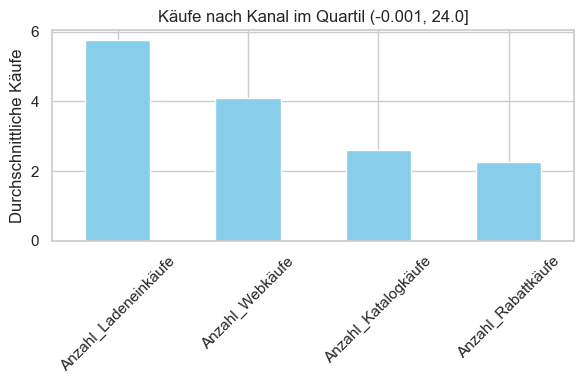

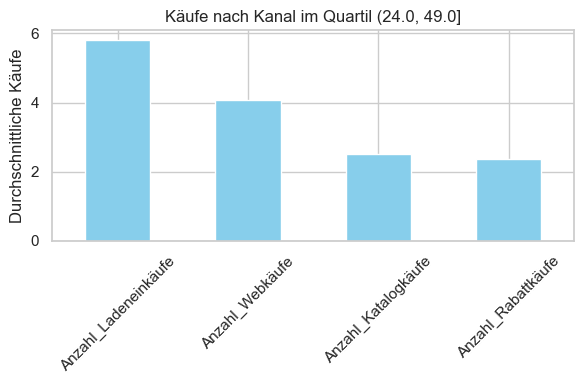

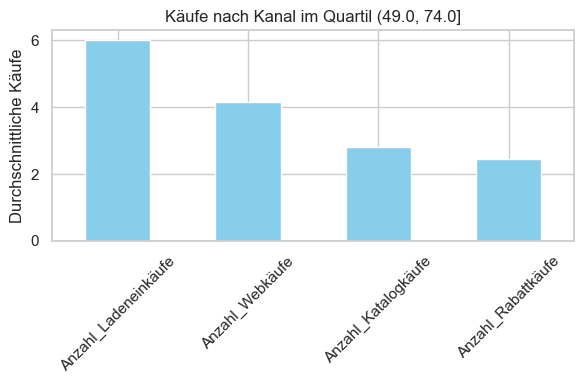

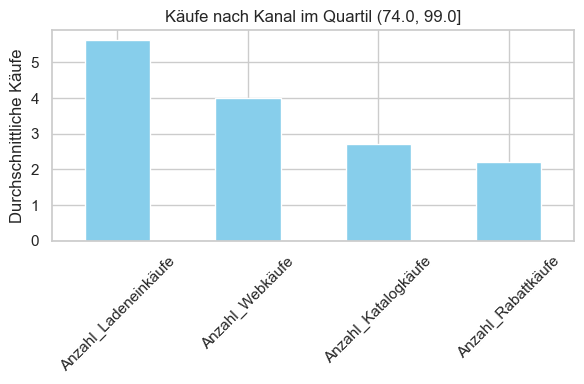

In [62]:
quartile = pd.qcut(df['Letzter_Kauf_Tage'], 4)      # Quartile bilden

recency_means = df.groupby(quartile)[['Anzahl_Webkäufe',            # Mittelwerte pro Quartil für die Kanäle berechnen
                                      'Anzahl_Ladeneinkäufe',
                                      'Anzahl_Katalogkäufe',
                                      'Anzahl_Rabattkäufe']].mean()

for q in recency_means.index:
    plt.figure(figsize=(6, 4))
    recency_means.loc[q].sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title(f'Käufe nach Kanal im Quartil {q}')
    plt.ylabel('Durchschnittliche Käufe')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### Das Kaufverhalten ist erstaunlich stabil über weite Teile der Kundenbasis, nur bei längerer Inaktivität nimmt die Nutzung aller Kanäle ab. Recency ist somit ein wichtiger Indikator für Kundenabwanderung, weniger füür Unterschiede im Kanal-Mix

### Feature Engineering

In [63]:
df['Alter'] = 2025 - df['Geburtsjahr']

df['Kundenbeziehung_Dauer'] = (pd.to_datetime('today') - pd.to_datetime(df['Datum_Kunde'])).dt.days

df['Anzahl_Käufe'] = (                      # Neue Spalte Gesamtanzahl der Käufe
    df['Anzahl_Webkäufe'] +
    df['Anzahl_Katalogkäufe'] +
    df['Anzahl_Ladeneinkäufe']
)

df['Durchschnittsausgaben_pro_Kauf'] = np.where(        
    df['Anzahl_Käufe'] > 0,
    df['Gesamtausgaben'] / df['Anzahl_Käufe'], 0
)

df['Anteil_Webkäufe'] = np.where(                       # Anteile der Käufe pro Kanal
    df['Anzahl_Käufe'] > 0,
    df['Anzahl_Webkäufe'] / df['Anzahl_Käufe'], 0
)

df['Anteil_Katalogkäufe'] = np.where(
    df['Anzahl_Käufe'] > 0,
    df['Anzahl_Katalogkäufe'] / df['Anzahl_Käufe'], 0
)

df['Anteil_Ladeneinkäufe'] = np.where(
    df['Anzahl_Käufe'] > 0,
    df['Anzahl_Ladeneinkäufe'] / df['Anzahl_Käufe'], 0
)

df['Anteil_Rabattkäufe'] = np.where(
    df['Anzahl_Käufe'] > 0,
    df['Anzahl_Rabattkäufe'] / df['Anzahl_Käufe'], 0
)

for col in ['Ausgaben_Wein', 'Ausgaben_Obst', 'Ausgaben_Fleisch',           # Ausgabenstruktur
            'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten', 'Ausgaben_Gold']:
    df[f'Anteil_{col}'] = np.where(
        df['Gesamtausgaben'] > 0,
        df[col] / df['Gesamtausgaben'], 0
    )

df['Premiumkunde'] = (df['Gesamtausgaben'] > df['Gesamtausgaben'].median()).astype(int)

df['Aktiv_30Tage'] = (df['Letzter_Kauf_Tage'] <= 30).astype(int)



In [64]:
df.columns

Index(['ID', 'Geburtsjahr', 'Bildungsniveau', 'Familienstand', 'Einkommen',
       'Kinder_zu_Hause', 'Teenager_zu_Hause', 'Datum_Kunde',
       'Letzter_Kauf_Tage', 'Beschwerde', 'Ausgaben_Wein', 'Ausgaben_Obst',
       'Ausgaben_Fleisch', 'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten',
       'Ausgaben_Gold', 'Anzahl_Rabattkäufe', 'Anzahl_Webkäufe',
       'Anzahl_Katalogkäufe', 'Anzahl_Ladeneinkäufe',
       'Anzahl_WebBesuche_Monat', 'Kampagne_1_Akzeptiert',
       'Kampagne_2_Akzeptiert', 'Kampagne_3_Akzeptiert',
       'Kampagne_4_Akzeptiert', 'Kampagne_5_Akzeptiert',
       'Antwort_Letzte_Kampagne', 'Klein_EK_Flag_Alle',
       'Klein_EK_Flag_Partner', 'Gesamtausgaben', 'Kinder_Teenager_gesamt',
       'Kampagnen_Gesamtannahme', 'Kampagnen_Anzahl_Akzeptiert',
       'Einkommen_Tertil', 'Alter', 'Kundenbeziehung_Dauer', 'Anzahl_Käufe',
       'Durchschnittsausgaben_pro_Kauf', 'Anteil_Webkäufe',
       'Anteil_Katalogkäufe', 'Anteil_Ladeneinkäufe', 'Anteil_Rabattkäufe',
       'Anteil_

## Cluster-Tendenzen prüfen

In [65]:
cluster_features = [                            # cluster_features festlegen
    'Einkommen', 'Gesamtausgaben', 'Letzter_Kauf_Tage', 'Anzahl_Webkäufe',
    'Anzahl_Katalogkäufe', 'Anzahl_Ladeneinkäufe', 'Anzahl_Rabattkäufe',
    'Kampagnen_Anzahl_Akzeptiert', 'Anteil_Webkäufe', 'Anteil_Katalogkäufe', 
    'Anteil_Ladeneinkäufe', 'Anteil_Rabattkäufe', 'Durchschnittsausgaben_pro_Kauf',
    'Kinder_Teenager_gesamt', 'Premiumkunde', 'Kundenbeziehung_Dauer', 'Aktiv_30Tage'
]

X = df[cluster_features].copy()

scaler = StandardScaler()                       # Standardisieren
X_scaled = scaler.fit_transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

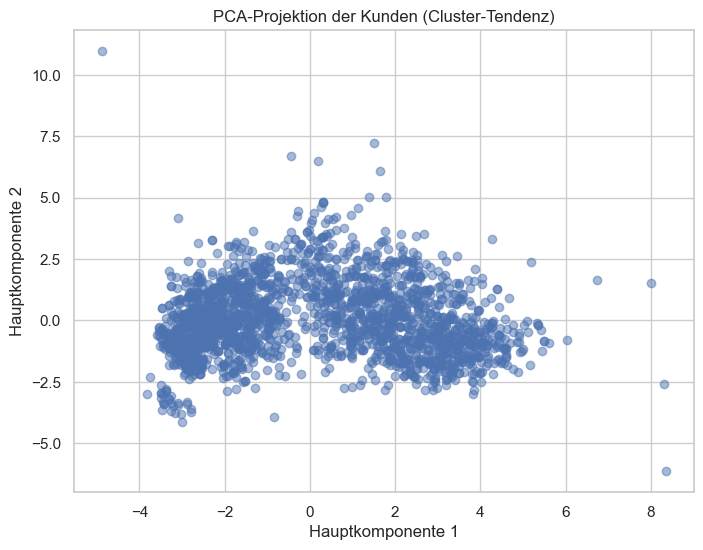

In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title('PCA-Projektion der Kunden (Cluster-Tendenz)')
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')
plt.show

##### Die Kunden bilden eine große, recht homogene Masse, aber es gibt Anzeichen für Subgruppen am Rand. Hauptmasse sind Durchschnittskunden und kleine Cluster mit Premium- oder Randgruppen

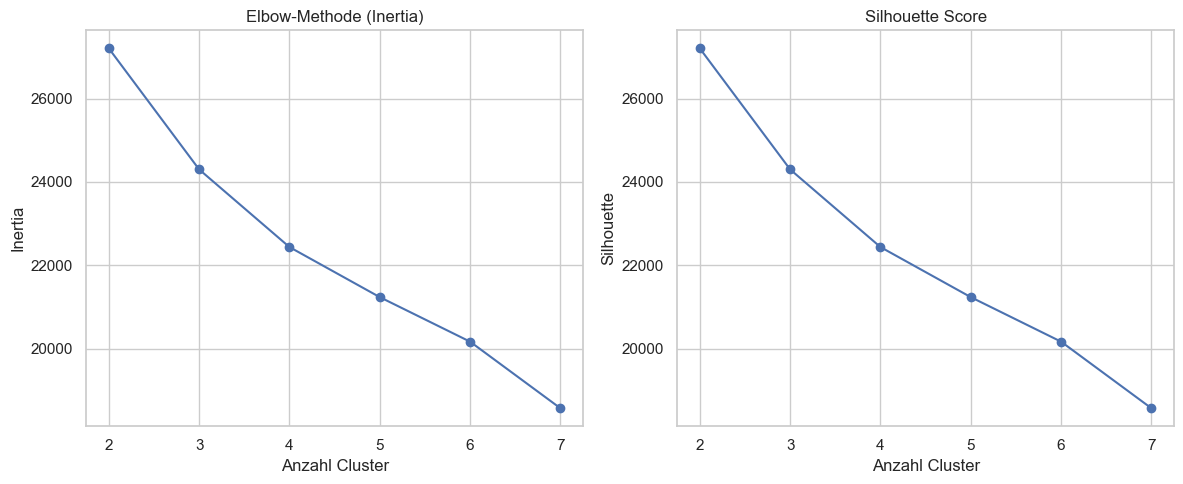

In [67]:
inertias = []
silhouettes = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(range(2,8), inertias, marker='o')
plt.title('Elbow-Methode (Inertia)')
plt.xlabel('Anzahl Cluster')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(range(2,8), inertias, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Anzahl Cluster')
plt.ylabel('Silhouette')
plt.tight_layout()
plt.show()

##### Nach Betrachtung der Elbow-Methode, ist der größte Knick bei 3 oder 4, heisst 3 oder 4 Cluster bilden, nach Silhouette sollten es 2 Cluster sein, die am besten getrennt sind, danach geht es kontinuierlich nach unten, was bedeutet, dass die mehr und mehr verschwimmen. DArum entscheide ich mich für 3 Cluster.

In [68]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)                # Erstellung einer Cluster-Spalte

cluster_profile = df.groupby('Cluster')[cluster_features].mean().round(2)

print('Cluster-Profil (Mittelwerte):')              # Cluster-Profiling
display(cluster_profile)

print('\nClustergrößen:')
print(df['Cluster'].value_counts())

Cluster-Profil (Mittelwerte):


,Einkommen,Gesamtausgaben,Letzter_Kauf_Tage,Anzahl_Webkäufe,Anzahl_Katalogkäufe,Anzahl_Ladeneinkäufe,Anzahl_Rabattkäufe,Kampagnen_Anzahl_Akzeptiert,Anteil_Webkäufe,Anteil_Katalogkäufe,Anteil_Ladeneinkäufe,Anteil_Rabattkäufe,Durchschnittsausgaben_pro_Kauf,Kinder_Teenager_gesamt,Premiumkunde,Kundenbeziehung_Dauer,Aktiv_30Tage
Cluster,,,,,,,,,,,,,,,,,
0,76565.78,1395.95,50.85,4.68,6.33,8.12,1.23,1.12,0.24,0.33,0.42,0.07,78.38,0.17,0.99,804.03,0.31
1,35773.25,106.98,49.12,2.22,0.58,3.35,2.14,0.18,0.34,0.08,0.58,0.36,15.16,1.25,0.00,782.39,0.32
2,59499.19,809.39,47.69,6.93,3.19,8.14,3.63,0.34,0.38,0.17,0.45,0.21,43.97,1.10,0.97,873.29,0.34



Clustergrößen:
Cluster
1    1096
2     605
0     535
Name: count, dtype: int64


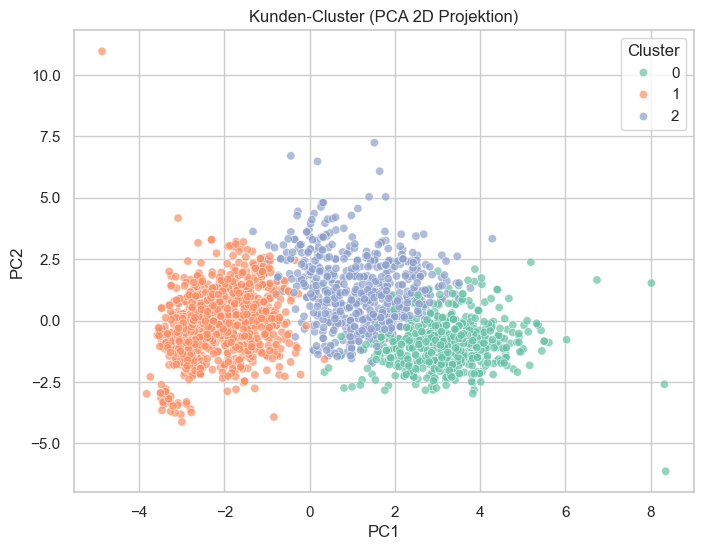

In [69]:
pca = PCA(n_components=2)
X_pca =pca.fit_transform(X_scaled)

df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='Cluster',
    palette='Set2', data=df, alpha=0.7
)
plt.title('Kunden-Cluster (PCA 2D Projektion)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()

## Cluster-Profilierung

Cluster-Größen:
Cluster
1    49.0
2    27.0
0    24.0
Name: proportion, dtype: float64

Median-Werte je Cluster:
         Geburtsjahr  Einkommen  Gesamtausgaben
Cluster                                        
0             1979.0    77044.0          1380.0
1             1982.0    35683.0            67.5
2             1976.0    60000.0           736.0

Bildungsniveau je Cluster:
Bildungsniveau  Doktor  Grundbildung  Hochschulabschluss  Master  \
Cluster                                                            
0                 0.24           NaN                0.51    0.17   
1                 0.19          0.05                0.49    0.17   
2                 0.25          0.00                0.51    0.16   

Bildungsniveau  Zweiter Studienzyklus  
Cluster                                
0                                0.08  
1                                0.11  
2                                0.07  

Familienstand je Cluster:
Familienstand  Geschieden  Ledig  Verheiratet  Verw

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\1977884430.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Einkommen', data=df, palette='Set2')


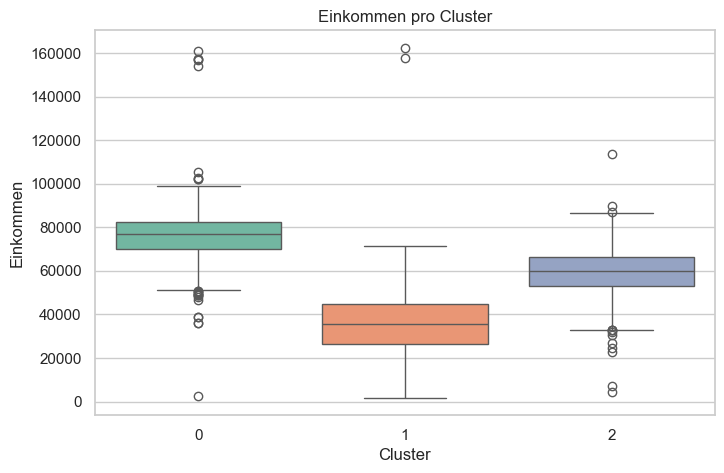

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\1977884430.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Gesamtausgaben', data=df, palette='Set3')


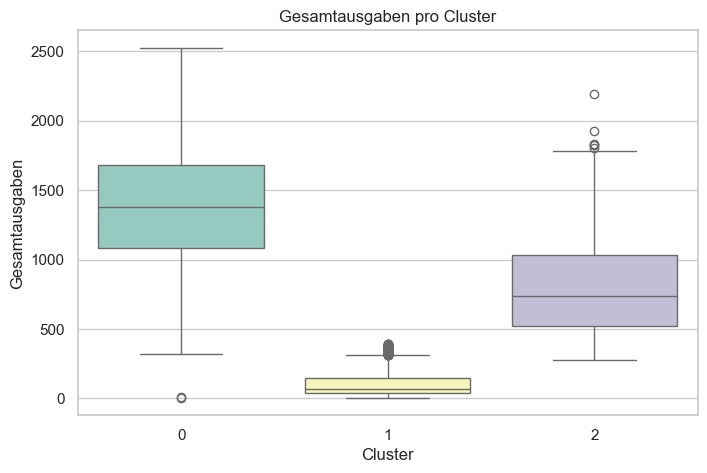

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\1977884430.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Kampagnen_Anzahl_Akzeptiert', data=df, palette='crest', errorbar=None)


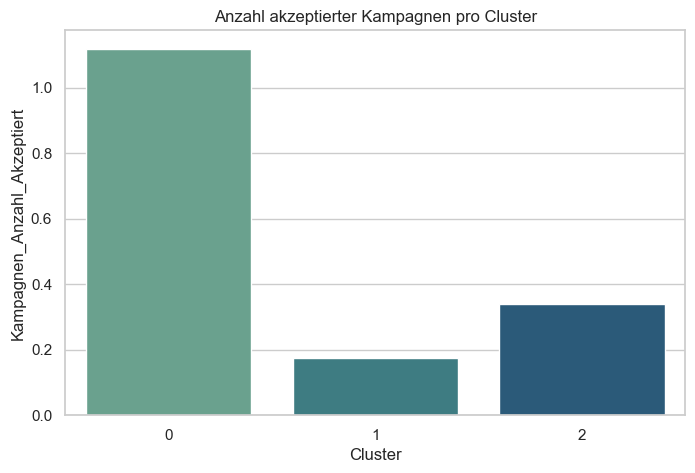

In [94]:
print('Cluster-Größen:')
print(df['Cluster'].value_counts(normalize=True).round(2) * 100)            # Cluster-Größe

print('\nMedian-Werte je Cluster:')
print(df.groupby('Cluster')[['Geburtsjahr', 'Einkommen', 'Gesamtausgaben']].median())

print('\nBildungsniveau je Cluster:')
print(df.groupby('Cluster')[['Bildungsniveau']].value_counts(normalize=True).unstack().round(2))

print('\nFamilienstand je Cluster:')
print(df.groupby('Cluster')[['Familienstand']].value_counts(normalize=True).unstack().round(2))

print('\nKinder/Teenager im Haushalt:')
print(df.groupby('Cluster')[['Kinder_zu_Hause', 'Teenager_zu_Hause']].mean().round(2))

kaufarten = ['Anzahl_Webkäufe', 'Anzahl_Katalogkäufe',          # Kaufverhalten Kanäle
             'Anzahl_Ladeneinkäufe', 'Anzahl_Rabattkäufe']

print('\nMedian-Käufe nach Cluster:')
print(df.groupby('Cluster')[kaufarten].median())

kampagnen = [col for col in df.columns if 'Kampagne' in col]    # Kampagnen
print('\nKampagnien-Annahmequote pro Cluster:')
print(df.groupby('Cluster')[kampagnen].mean().round(2))

print('\nMedian Recency (Tage seit letztem Kauf):')
print(df.groupby('Cluster')['Letzter_Kauf_Tage'].median())

plt.figure(figsize=(8, 5))                      # Visualisierung Einkommen pro Cluster
sns.boxplot(x='Cluster', y='Einkommen', data=df, palette='Set2')
plt.title('Einkommen pro Cluster')
plt.show()

plt.figure(figsize=(8, 5))                      # Visualisierung Gesamtausgaben pro Cluster
sns.boxplot(x='Cluster', y='Gesamtausgaben', data=df, palette='Set3')
plt.title('Gesamtausgaben pro Cluster')
plt.show()

if 'Kampagnen_Anzahl_Akzeptiert' in df.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x='Cluster', y='Kampagnen_Anzahl_Akzeptiert', data=df, palette='crest', errorbar=None)
    plt.title('Anzahl akzeptierter Kampagnen pro Cluster')
    plt.show()



## Interpretation
##### siehe Word-Dokument

## Modellierung
##### 1. Kampagnen-Response-Modell 

In [71]:
df.columns

Index(['ID', 'Geburtsjahr', 'Bildungsniveau', 'Familienstand', 'Einkommen',
       'Kinder_zu_Hause', 'Teenager_zu_Hause', 'Datum_Kunde',
       'Letzter_Kauf_Tage', 'Beschwerde', 'Ausgaben_Wein', 'Ausgaben_Obst',
       'Ausgaben_Fleisch', 'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten',
       'Ausgaben_Gold', 'Anzahl_Rabattkäufe', 'Anzahl_Webkäufe',
       'Anzahl_Katalogkäufe', 'Anzahl_Ladeneinkäufe',
       'Anzahl_WebBesuche_Monat', 'Kampagne_1_Akzeptiert',
       'Kampagne_2_Akzeptiert', 'Kampagne_3_Akzeptiert',
       'Kampagne_4_Akzeptiert', 'Kampagne_5_Akzeptiert',
       'Antwort_Letzte_Kampagne', 'Klein_EK_Flag_Alle',
       'Klein_EK_Flag_Partner', 'Gesamtausgaben', 'Kinder_Teenager_gesamt',
       'Kampagnen_Gesamtannahme', 'Kampagnen_Anzahl_Akzeptiert',
       'Einkommen_Tertil', 'Alter', 'Kundenbeziehung_Dauer', 'Anzahl_Käufe',
       'Durchschnittsausgaben_pro_Kauf', 'Anteil_Webkäufe',
       'Anteil_Katalogkäufe', 'Anteil_Ladeneinkäufe', 'Anteil_Rabattkäufe',
       'Anteil_

In [72]:
cluster_features = [                            # cluster_features festlegen
    'Einkommen', 'Gesamtausgaben', 'Letzter_Kauf_Tage', 'Anzahl_Webkäufe',
    'Anzahl_Katalogkäufe', 'Anzahl_Ladeneinkäufe', 'Anzahl_Rabattkäufe',
    'Anteil_Webkäufe', 'Anteil_Katalogkäufe', 'Anteil_Ladeneinkäufe', 
    'Anteil_Rabattkäufe', 'Durchschnittsausgaben_pro_Kauf', 'Kinder_Teenager_gesamt',
    'Premiumkunde', 'Kundenbeziehung_Dauer', 'Aktiv_30Tage',
    'Familienstand', 'Bildungsniveau'
]

X = df[cluster_features].copy()

y = df['Antwort_Letzte_Kampagne']

cat_features = ['Familienstand', 'Bildungsniveau']           # kathegorische und numerische Features trennen
num_features = [col for col in X.columns if col not in cat_features]

preprocessor = ColumnTransformer(                                       # Preprocessing: Skalierung und OneHotEncoding
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       # Train-Test-Split



In [73]:
log_reg = Pipeline(steps=[                          # Pipeline mit Preprocessing und Modell
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [74]:
y_pred = log_reg.predict(X_test)             # Vorhersagen
y_proba = log_reg.predict_proba(X_test)[:, 1]

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nROC-AUC:', roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[552  19]
 [ 72  28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       571
           1       0.60      0.28      0.38       100

    accuracy                           0.86       671
   macro avg       0.74      0.62      0.65       671
weighted avg       0.84      0.86      0.84       671


ROC-AUC: 0.8605516637478109


##### Das Modell ist extrem gut darin, Nicht-Reagierer zu erkennen (Recall 97%) aber es hat heftige Probleme Reagierer zu erkennen (Recall nur 28%), das heißt viele echte Reagierer gehen verloren. Ich werde versuchen mit Threshold-Tuning durch herabsetzen der Schwelle von 0,5 auf 0,3 mehr Reagierer zu erkennen, auch wenn es zu Lasten der Erkennung der Nicht-Reagierer geht.

In [75]:
y_probs = log_reg.predict_proba(X_test)[:, 1]             # Wahrscheinlichkeiten der positiven Klasse (Reagierer)

threshold = 0.3                         # Schwelle anpassen
y_pred_adj = (y_probs >= threshold).astype(int)

print('Confusion Matrix:')              # Neue Auswertung
print(confusion_matrix(y_test, y_pred_adj))

print('\nClassification Report:')
print(classification_report(y_test, y_pred_adj))

print('\nROC-AUC:', roc_auc_score(y_test, y_probs))

Confusion Matrix:
[[517  54]
 [ 51  49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       571
           1       0.48      0.49      0.48       100

    accuracy                           0.84       671
   macro avg       0.69      0.70      0.70       671
weighted avg       0.85      0.84      0.84       671


ROC-AUC: 0.8605516637478109


In [76]:
X_encoded = pd.get_dummies(X, drop_first=True)              # Dummy -Codierung für kategoriale Variablen

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

log_reg_balanced = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')      # Modell mit Gewichtung für unbalancierte Klassen
log_reg_balanced.fit(X_train, y_train)

y_pred_bal = log_reg_balanced.predict(X_test)               # Vorhersagen
y_probs_bal = log_reg_balanced.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_bal))


Confusion Matrix:
 [[444 127]
 [ 22  78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86       571
           1       0.38      0.78      0.51       100

    accuracy                           0.78       671
   macro avg       0.67      0.78      0.68       671
weighted avg       0.87      0.78      0.80       671

ROC-AUC: 0.8427408056042031


c:\Users\thort\Documents\DataSmart Point\Unterrichtsmaterialien\07. Machine Learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Recall (Sensitivität) ist verbessert, was oft das Ziel im Marketing ist (lieber mehr potenzielle Responder erreichen, auch wenn manche Fehlalarme dabei sind). Dafür leidet die Precision: das Modell wirft mehr Streuverluste. Ich versuche den optimalen Schwellenwert zu ermitteln.

In [77]:
y_probs = log_reg_balanced.predict_proba(X_test)[:, 1]              # Wahrscheinlichkeiten für Klasse 1 (Responder)

threshold = 0.5
y_pred_thresh = (y_probs >= threshold).astype(int)

print("Confusion Matrix (Threshold = 0.3):")
print(confusion_matrix(y_test, y_pred_thresh))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_thresh, digits=2))

Confusion Matrix (Threshold = 0.3):
[[444 127]
 [ 22  78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       571
           1       0.38      0.78      0.51       100

    accuracy                           0.78       671
   macro avg       0.67      0.78      0.68       671
weighted avg       0.87      0.78      0.80       671



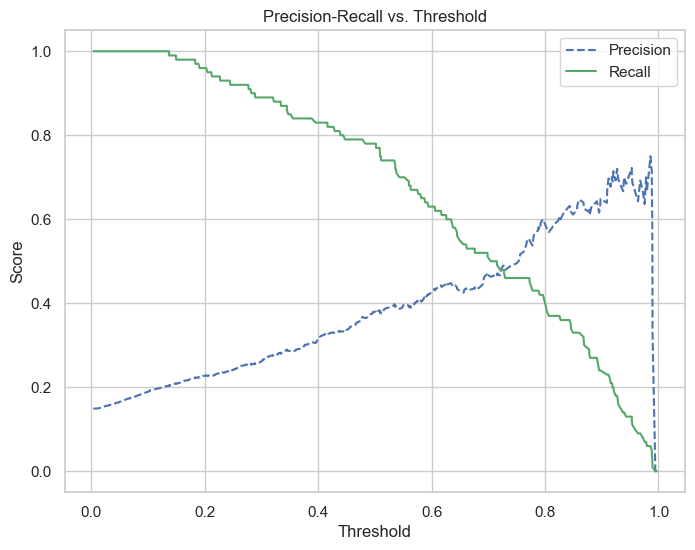

In [78]:
prec, rec, thresh = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(thresh, prec[:-1], "b--", label="Precision")
plt.plot(thresh, rec[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.show()

##### Mit den linearen Modellen komme ich nicht weit, ich brauche komplexere nichtlineare Modelle, wie z. B. Random Forest.

In [79]:
rf = RandomForestClassifier(                        # Modell initialisieren
    n_estimators=200,               # Anzahl Bäume
    max_depth=None,                 # keine Begrenzung der Bäume
    random_state=42,
    class_weight='balanced'         # wichtig wegen der ungleichen Klassen
)
rf.fit(X_train, y_train)            # Trainieren

y_pred_rf = rf.predict(X_test)
y_probs_rf =rf.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_probs_rf))

[[558  13]
 [ 77  23]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       571
           1       0.64      0.23      0.34       100

    accuracy                           0.87       671
   macro avg       0.76      0.60      0.63       671
weighted avg       0.84      0.87      0.84       671

ROC-AUC: 0.8706917688266201


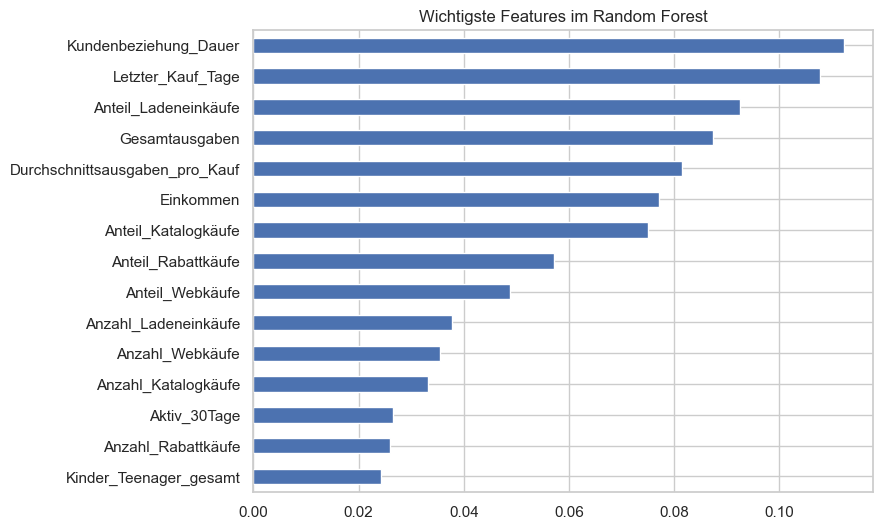

In [80]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True).tail(15).plot(kind="barh", figsize=(8,6))
plt.title("Wichtigste Features im Random Forest")
plt.show()

C:\Users\thort\AppData\Local\Temp\ipykernel_15000\1539466902.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


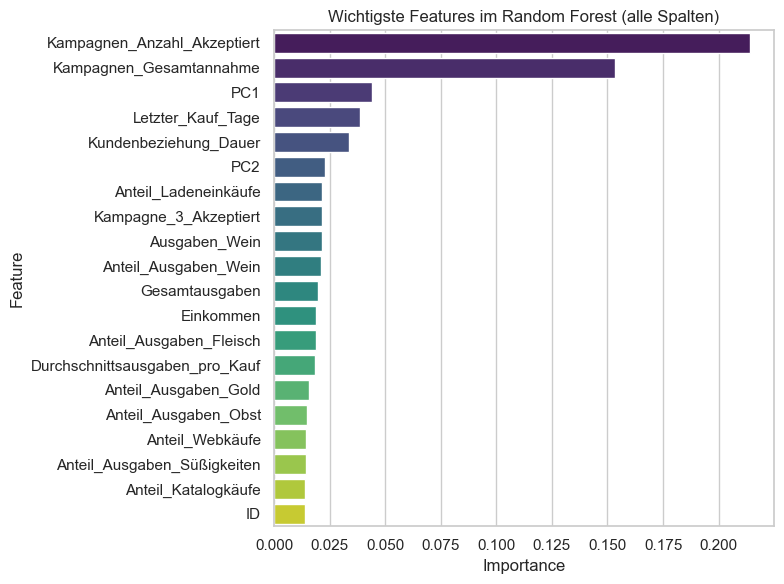

In [81]:
y = df['Antwort_Letzte_Kampagne']
X = df.drop(columns=['Antwort_Letzte_Kampagne'])

cat_features = X.select_dtypes(include=['object', 'category']).columns
num_features = X.select_dtypes(include=[np.number]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

rf.fit(X_train, y_train)

ohe = rf.named_steps['preprocessor'].named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(cat_features)
all_features = np.concatenate([num_features, ohe_features])

importances = rf.named_steps['classifier'].feature_importances_

feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(20) 

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title('Wichtigste Features im Random Forest (alle Spalten)')
plt.tight_layout()
plt.show()

In [82]:
df.columns

Index(['ID', 'Geburtsjahr', 'Bildungsniveau', 'Familienstand', 'Einkommen',
       'Kinder_zu_Hause', 'Teenager_zu_Hause', 'Datum_Kunde',
       'Letzter_Kauf_Tage', 'Beschwerde', 'Ausgaben_Wein', 'Ausgaben_Obst',
       'Ausgaben_Fleisch', 'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten',
       'Ausgaben_Gold', 'Anzahl_Rabattkäufe', 'Anzahl_Webkäufe',
       'Anzahl_Katalogkäufe', 'Anzahl_Ladeneinkäufe',
       'Anzahl_WebBesuche_Monat', 'Kampagne_1_Akzeptiert',
       'Kampagne_2_Akzeptiert', 'Kampagne_3_Akzeptiert',
       'Kampagne_4_Akzeptiert', 'Kampagne_5_Akzeptiert',
       'Antwort_Letzte_Kampagne', 'Klein_EK_Flag_Alle',
       'Klein_EK_Flag_Partner', 'Gesamtausgaben', 'Kinder_Teenager_gesamt',
       'Kampagnen_Gesamtannahme', 'Kampagnen_Anzahl_Akzeptiert',
       'Einkommen_Tertil', 'Alter', 'Kundenbeziehung_Dauer', 'Anzahl_Käufe',
       'Durchschnittsausgaben_pro_Kauf', 'Anteil_Webkäufe',
       'Anteil_Katalogkäufe', 'Anteil_Ladeneinkäufe', 'Anteil_Rabattkäufe',
       'Anteil_

In [84]:
y = df['Antwort_Letzte_Kampagne']

df_encoded = pd.get_dummies(df, columns=['Familienstand', 'Bildungsniveau'], drop_first=True )

features = [
  'Einkommen', 'Gesamtausgaben', 'Letzter_Kauf_Tage', 'Anzahl_Webkäufe', 'Anzahl_Katalogkäufe', 
  'Anzahl_Ladeneinkäufe', 'Anzahl_Rabattkäufe', 'Anteil_Webkäufe', 'Anteil_Katalogkäufe', 
  'Anteil_Ladeneinkäufe', 'Anteil_Rabattkäufe', 'Durchschnittsausgaben_pro_Kauf', 'Kinder_Teenager_gesamt',
  'Premiumkunde', 'Kundenbeziehung_Dauer',  'Alter', 'Anzahl_Käufe', 'Aktiv_30Tage'
]

features += [col for col in df_encoded.columns if col.startswith('Familienstand_')]
features += [col for col in df_encoded.columns if col.startswith('Bildungsniveau_')]


X = df_encoded[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_probs = rf.predict_proba(X_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))

[[373   8]
 [ 48  19]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       381
           1       0.70      0.28      0.40        67

    accuracy                           0.88       448
   macro avg       0.79      0.63      0.67       448
weighted avg       0.86      0.88      0.85       448

ROC-AUC: 0.8586202844047478


In [85]:
pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)           # Verhältnis berechnen: Negative zu Positive

xgb = XGBClassifier(                        # Modell mit Gewichtung
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=pos_weight)       # Gewicht für Klasse 1

param_grid = {                           # GridSearch Parameter
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',              # Optimierung auf ROC-AUC
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_                  # Bestes Modell
print('Beste Parameter:', grid_search.best_params_)

#y_pred = best_xgb.predict(X_test)
y_probs = best_xgb.predict_proba(X_test)[:,1]           # Wahrscheinlichkeiten berechnen nur für Klasse 1

threshold = 0.61                # ermittelt aus dem Code in der nächsten Zelle
y_pred_custom = (y_probs >= threshold).astype(int)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))       

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Beste Parameter: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Confusion Matrix:
 [[342  39]
 [ 23  44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       381
           1       0.53      0.66      0.59        67

    accuracy                           0.86       448
   macro avg       0.73      0.78      0.75       448
weighted avg       0.88      0.86      0.87       448

ROC-AUC: 0.8818701766756767


c:\Users\thort\Documents\DataSmart Point\Unterrichtsmaterialien\07. Machine Learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:26:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [87]:
y_probs = best_xgb.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 0.91, 0.01)       # Testet Thresholds von 0.4 bis 0.7
f1_scores = []

for t in thresholds:
    y_pred_custom = (y_probs >= t).astype(int)
    f1 = f1_score(y_test, y_pred_custom, pos_label=1)
    f1_scores.append(f1)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f'Bester Threshold: {best_threshold:.2f} mit F1-Score: {best_f1:.3f}')     

Bester Threshold: 0.61 mit F1-Score: 0.587


### Confusion Matrix:
##### Ich habe 381 echte Verweigerer und 67 echte Responder im Testset. Das Modell erkennt die meisten Verweigerer gut, aber bei den Respondern bleiben 23 unentdeckt
### Metriken pro Klasse:
##### Klasse 0: Wenn das Model kein Response sagt, stimmt das zu 94%, 90% aller echten Nicht-responder sind korrekt erkannt. Der f1-Score sagt aus, wie genau ein positiver Vorhersagewert ist. In diesem Fall liegt er bei 92%, was ein starker Wert ist.
##### Klasse 1: Wenn das Modell Response vorhersagt, stimmt das nur bei 53% der Fälle und nur 66% der echten Responder werden erkannt, was zu einem F!-Score von 59% führt.
### Gesamtmetriken: 
##### Accuracy beträgt 86% der Gesamtvorhersagen. Der Macro AVG F1 ist der ungewichtete Durchschnitt der F1-Scores aller Klassen und der beträgt 75% und zeigt wie gut das Modell beide Klassen behandelt, es ist also ein fairer Wert für unausgeglichene Datensätze, wohingegen der Weighted AVG F1 nach Anzahl der fälle gewichtet. Große Klassen haben also mehr Einfluß und der liegt hier bei 87%.
##### ROC-AUC ist gut, um die Ranking-Fähigkeit des Modells zu bewerten und sehr wichtig für das Marketing. Der ROC-AUC ist ein Wert, also eine Kennzahl, der oft als Score bezeichnet wird. In diesem Fall liegt der Wert bei 0,88 und zeigt die Trennschärfe des Modells, also wie gut kann das Modell Responder von Nicht-Responder trennen. 
##### Fazit: Das Modell ist gut zum Ranken der Kunden nach Response-Wahrscheinlichkeit und das wird gebraucht für Kampagnen-Selektionslisten.

c:\Users\thort\Documents\DataSmart Point\Unterrichtsmaterialien\07. Machine Learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\thort\AppData\Local\Temp\ipykernel_15000\897776348.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modell', y='ROC-AUC', data=results, ax=axes[0], palette='Blues_d')
C:\Users\t

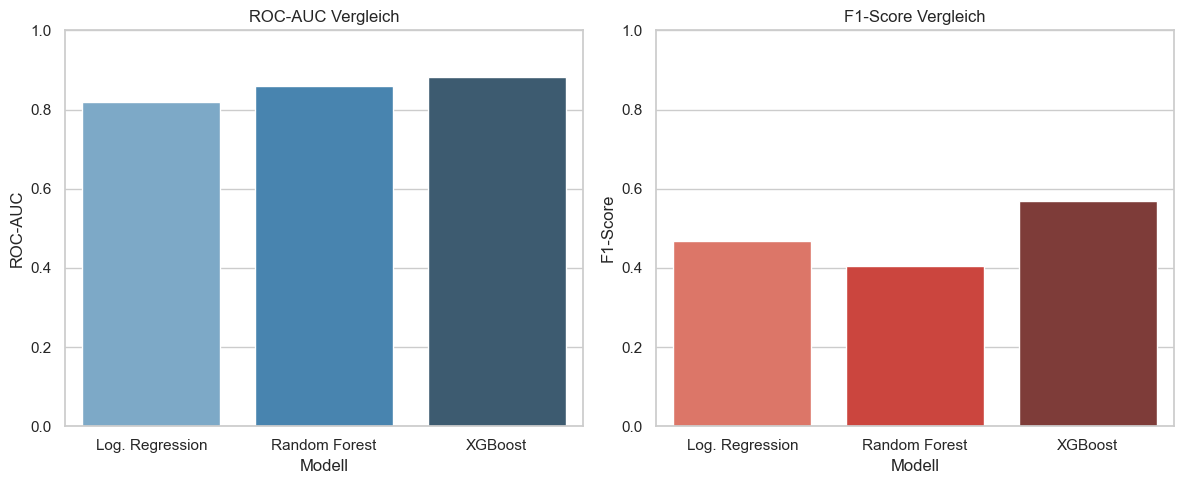

In [88]:
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train, y_train)

models = {'Log. Regression': log_reg,           # Modelle und ihre Vorhersagen als Vergleich
          'Random Forest': rf,
          'XGBoost': best_xgb}

roc_auc_scores = []
f1_scores = []

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    roc_auc_scores.append(roc_auc_score(y_test, y_probs))
    f1_scores.append(f1_score(y_test, y_pred))

results = pd.DataFrame({                        # in ein DataFrame packen
    'Modell': list(models.keys()),
    'ROC-AUC': roc_auc_scores,
    'F1-Score': f1_scores
})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))         # Plot
sns.barplot(x='Modell', y='ROC-AUC', data=results, ax=axes[0], palette='Blues_d')
axes[0].set_title('ROC-AUC Vergleich')
axes[0].set_ylim(0, 1)

sns.barplot(x='Modell', y='F1-Score', data=results, ax=axes[1], palette='Reds_d')
axes[1].set_title('F1-Score Vergleich')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

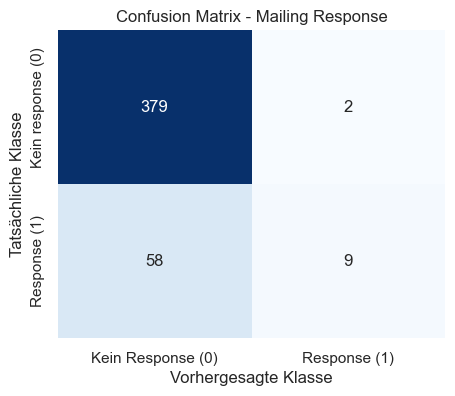

In [89]:
cm = confusion_matrix(y_test, y_pred_custom)        # Confusion-Matrix berechnen

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Kein Response (0)', 'Response (1)'],
            yticklabels=['Kein response (0)', 'Response (1)'])
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Confusion Matrix - Mailing Response')
plt.show()

In [90]:
def precision_at_k(y_true, y_probs, k=0.1):         # Berechne Precision @k, y_true: echte labels, y_probs: Modellwahrscheinlichkeiten für Klasse 1, k: Anteil Kunden (Top10%)
    cutoff = int(len(y_probs) * k)                  # Anzahl Kunden, die in Top-k genommen werden
    idx = np.argsort(y_probs)[::-1][:cutoff]        # Wahrscheinlichkeiten sortieren (absteigend)
    selected_true = y_true.iloc[idx] if hasattr(y_true, 'iloc') else y_true[idx]                # echte Treffer in Top-k
    precision = selected_true.mean()
    return precision

p_at_10 = precision_at_k(y_test, y_probs, k=0.1)    # Top 10% Kunden
print(f'Precision @ 10%: {p_at_10:.2f}')

for k in [0.05, 0.1, 0.2, 0.3]:
    print(f'Precision @ {int(k*100)}%: {precision_at_k(y_test, y_probs, k):.2f}')

Precision @ 10%: 0.55
Precision @ 5%: 0.59
Precision @ 10%: 0.55
Precision @ 20%: 0.51
Precision @ 30%: 0.43


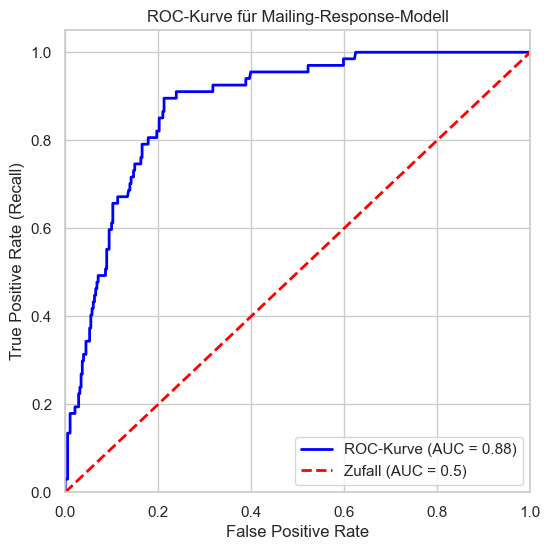

In [91]:
fpr, tpr, thesholds = roc_curve(y_test, y_probs)            # ROC-Daten berechnen; fpr = False Positive Rate und tpr = True Positive Rate
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))                                   # Plot
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-Kurve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Zufall (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC-Kurve für Mailing-Response-Modell')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### Die blaue Linie ist das Modell, wobei die rot-gestrichelte Linie Zufall wäre- Je weiter die Linie nach links oben ausbeult, desto besser ist das Modell.
##### Mit dem aktuellen Schwellenwert (Threshold 0.61) befinden wir uns auf der ROC-Kurve an einem Punkt, wo 2 von 3 Respondern erkannt werden. Guter Recall und nur 1 von 10 Nicht-Respondern wird falsch klassifiziert.

## Daten speichern
##### Aktuellen Stand als 'df_bereinigt.csv' sichern

In [95]:
df.to_parquet("bereinigt.parquet", index=False, engine="fastparquet")
print("Parquet erfolgreich gespeichert ✅")

Parquet erfolgreich gespeichert ✅
